## Compute threshold 
Once you run the notebooks in Approach notebooks folder, you will have csv files that stores various statistical and non-statistical measures defined by our three approaches. Using this notebook, you can observe the relationship between the distribution of such measures for benign and adversarial samples and also compute threshold for bengin samples. 

In [1]:
import pandas as pd 
import os 

# CIFAR dataset

In [2]:
benign_cifar = "cifar/Benign_CIFAR_Metrics.csv"

In [3]:
df_ben = pd.read_csv(benign_cifar)

In [4]:
df_ben

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,10010,10011,10012,10013,10014,10015,10016,10017,10018,10019
0,Benign Median Absolute Dev,1.834076,1.569899,3.256130,1.851397,2.194643,1.599602,1.519082,2.119298,2.210379,...,1.889988,2.385140,1.274370,1.994939,2.362029,3.523703,3.150091,1.328754,2.150509,1.877101
1,Benign Mean Absolute Dev,2.920007,2.420557,7.067141,2.834400,3.986008,2.620350,2.544809,4.274296,3.742487,...,2.782730,4.743890,2.195086,3.498569,5.040321,7.968123,4.710049,2.149935,4.476342,3.275059
2,Benign IQR,4.049434,3.373636,8.878272,4.129986,4.931210,3.746076,3.436448,5.191701,5.068707,...,3.889843,5.335653,3.038046,4.754973,5.955440,9.420450,7.236280,3.016917,5.311189,4.694612
3,Coefficient of Variance,1.138545,1.303457,0.731101,1.239487,0.960543,1.094824,1.116856,0.883367,1.032462,...,1.113683,0.817212,1.009089,0.971059,0.859010,0.860545,1.089953,0.982755,0.816671,1.091482
4,Coef of IQR,0.511387,0.445339,0.675735,0.491804,0.530688,0.536400,0.492810,0.638972,0.534509,...,0.525759,0.582173,0.572006,0.608197,0.590208,0.619345,0.625638,0.566923,0.611218,0.528187
5,Input squeeze top 400,72.021744,153.087280,90.070999,158.383881,132.362686,140.771896,108.809082,174.248291,130.204346,...,87.247673,77.954391,176.090332,79.873840,138.872833,46.913139,129.487671,94.198494,125.031937,94.581985
6,Input squeeze top 450,70.491653,163.674164,95.294029,164.582184,123.661041,140.320343,111.774078,197.718781,138.960526,...,93.781883,101.986725,179.952789,89.476479,147.639801,62.857838,130.921509,96.312546,126.759743,95.395729
7,Input squeeze top 500,73.617195,168.820023,95.501205,171.477478,125.085388,148.452713,112.138374,205.253723,131.390213,...,89.808861,92.188690,175.861908,91.948715,159.993820,36.034409,124.495331,98.596436,109.400108,91.213661
8,Gaussian1 attribution,4536.158203,4780.049805,9460.377930,6242.307129,6172.190430,4968.943848,5330.434570,5598.574219,6068.672363,...,4904.749023,5729.184082,4387.420410,4965.416016,6907.733887,10082.505859,8844.380859,3527.051025,5506.044434,5110.323730
9,Gaussian2 attribution,4459.247559,3987.018066,7852.775879,5025.873047,5749.308105,4058.545410,4197.347656,5357.274414,5491.053223,...,4086.265625,5711.942383,3356.427734,4867.814453,6276.302734,9850.326172,7316.210938,3060.000977,5365.872070,4828.355469


In [6]:
#pgd with five epsilons
df_pgd_eps3 = pd.read_csv('cifar/PGD/eps8_255.csv')
df_pgd_eps4 = pd.read_csv('cifar/PGD/eps16_255.csv')
df_pgd_eps5 = pd.read_csv('cifar/PGD/eps32_255.csv')

#fgsm with five epsilons
df_fgsm_eps3 = pd.read_csv('cifar/FGSM/eps8_255.csv')
df_fgsm_eps4 = pd.read_csv('cifar/FGSM/eps16_255.csv')
df_fgsm_eps5 = pd.read_csv('cifar/FGSM/eps32_255.csv')

#bim with five epsilons
df_bim_eps3 = pd.read_csv('cifar/BIM/eps8_255.csv')
df_bim_eps4 = pd.read_csv('cifar/BIM/eps16_255.csv')
df_bim_eps5 = pd.read_csv('cifar/BIM/eps32_255.csv')

#cw with four confidences
df_cw_conf1 = pd.read_csv('cifar/CW/conf_0.csv')
df_cw_conf4 = pd.read_csv('cifar/CW/conf_50.csv')

# Approach1: Input squeezing

In [7]:
#benign 
top_400_benign = df_ben.iloc[5].values.flatten().tolist()[1:]
top_450_benign = df_ben.iloc[6].values.flatten().tolist()[1:]
top_500_benign = df_ben.iloc[7].values.flatten().tolist()[1:]

In [8]:
#pgd eps3
top_400_eps3 = df_pgd_eps3.iloc[5].values.flatten().tolist()[1:]
top_450_eps3 = df_pgd_eps3.iloc[6].values.flatten().tolist()[1:]
top_500_eps3 = df_pgd_eps3.iloc[7].values.flatten().tolist()[1:]

#pgd eps4
top_400_eps4 = df_pgd_eps4.iloc[5].values.flatten().tolist()[1:]
top_450_eps4 = df_pgd_eps4.iloc[6].values.flatten().tolist()[1:]
top_500_eps4 = df_pgd_eps4.iloc[7].values.flatten().tolist()[1:]

#pgd eps3
top_400_eps5 = df_pgd_eps5.iloc[5].values.flatten().tolist()[1:]
top_450_eps5 = df_pgd_eps5.iloc[6].values.flatten().tolist()[1:]
top_500_eps5 = df_pgd_eps5.iloc[7].values.flatten().tolist()[1:]


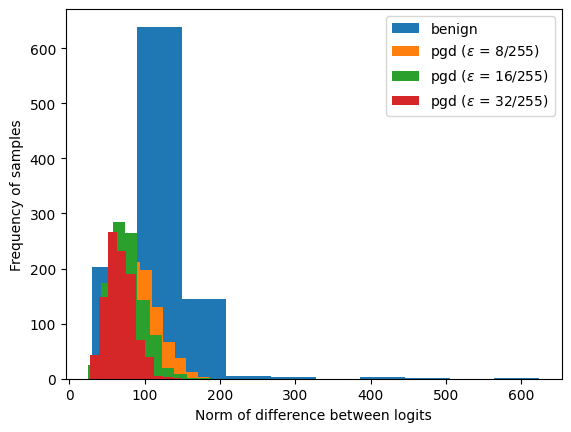

In [9]:
import matplotlib.pyplot as plt 

plt.hist(top_400_benign[0:1000], label="benign")
plt.hist(top_400_eps3[0:1000], label="pgd ($\epsilon$ = 8/255)")
plt.hist(top_400_eps4[0:1000], label="pgd ($\epsilon$ = 16/255)")
plt.hist(top_400_eps5[0:1000], label="pgd ($\epsilon$ = 32/255)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
plt.title("")
plt.show()

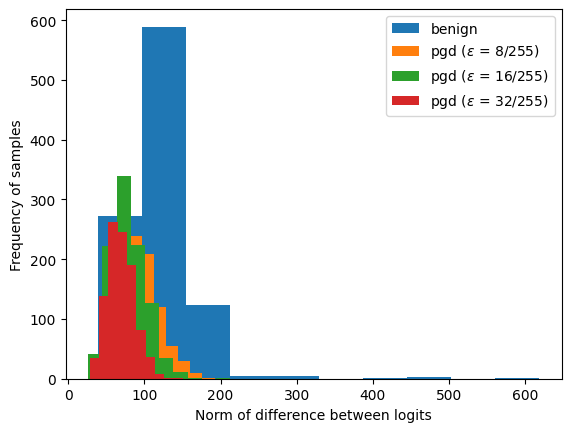

In [10]:
import matplotlib.pyplot as plt 

plt.hist(top_450_benign[0:1000], label="benign")
plt.hist(top_450_eps3[0:1000], label="pgd ($\epsilon$ = 8/255)")
plt.hist(top_450_eps4[0:1000], label="pgd ($\epsilon$ = 16/255)")
plt.hist(top_450_eps5[0:1000], label="pgd ($\epsilon$ = 32/255)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.title("")
plt.show()

In [11]:

#fgsm eps3
top_400_eps3 = df_fgsm_eps3.iloc[5].values.flatten().tolist()[1:]
top_450_eps3 = df_fgsm_eps3.iloc[6].values.flatten().tolist()[1:]
top_500_eps3 = df_fgsm_eps3.iloc[7].values.flatten().tolist()[1:]

#fgsm eps4
top_400_eps4 = df_fgsm_eps4.iloc[5].values.flatten().tolist()[1:]
top_450_eps4 = df_fgsm_eps4.iloc[6].values.flatten().tolist()[1:]
top_500_eps4 = df_fgsm_eps4.iloc[7].values.flatten().tolist()[1:]

#fgsm eps5
top_400_eps5 = df_fgsm_eps5.iloc[5].values.flatten().tolist()[1:]
top_450_eps5 = df_fgsm_eps5.iloc[6].values.flatten().tolist()[1:]
top_500_eps5 = df_fgsm_eps5.iloc[7].values.flatten().tolist()[1:]


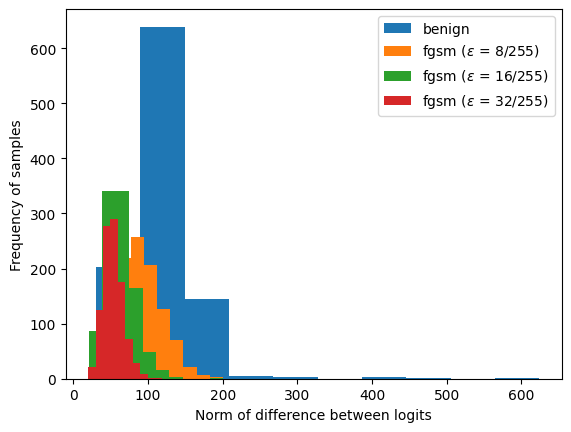

In [12]:
import matplotlib.pyplot as plt 

plt.hist(top_400_benign[0:1000], label="benign")
plt.hist(top_400_eps3[0:1000], label="fgsm ($\epsilon$ = 8/255)")
plt.hist(top_400_eps4[0:1000], label="fgsm ($\epsilon$ = 16/255)")
plt.hist(top_400_eps5[0:1000], label="fgsm ($\epsilon$ = 32/255)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.title("")
plt.show()

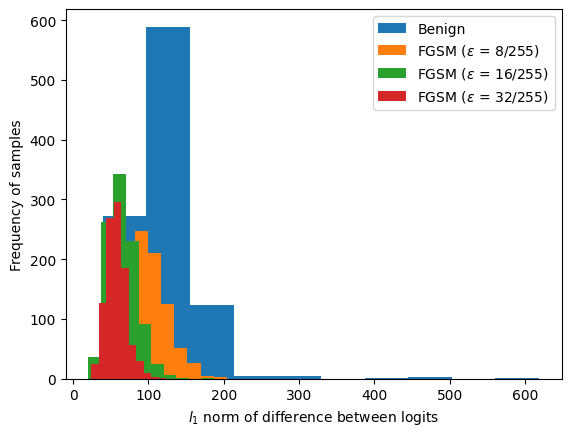

In [13]:
import matplotlib.pyplot as plt 

plt.hist(top_450_benign[0:1000], label="Benign")
plt.hist(top_450_eps3[0:1000], label="FGSM ($\epsilon$ = 8/255)")
plt.hist(top_450_eps4[0:1000], label="FGSM ($\epsilon$ = 16/255)")
plt.hist(top_450_eps5[0:1000], label="FGSM ($\epsilon$ = 32/255)")
plt.xlabel("$l_1$ norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
plt.savefig("plots/CIFARApproach1FGSM.pdf", format="pdf", bbox_inches="tight")
plt.show()

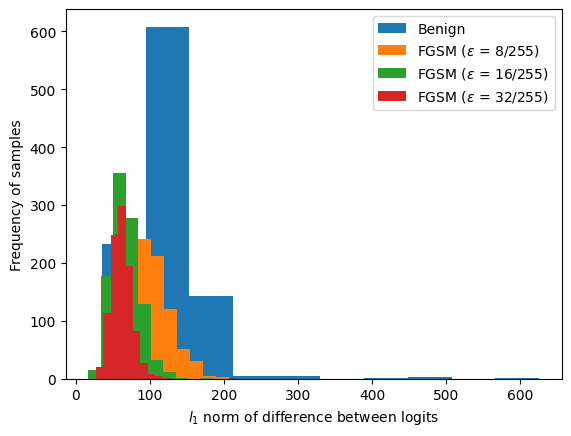

In [14]:
import matplotlib.pyplot as plt 

plt.hist(top_500_benign[0:1000], label="Benign")
plt.hist(top_500_eps3[0:1000], label="FGSM ($\epsilon$ = 8/255)")
plt.hist(top_500_eps4[0:1000], label="FGSM ($\epsilon$ = 16/255)")
plt.hist(top_500_eps5[0:1000], label="FGSM ($\epsilon$ = 32/255)")
plt.xlabel("$l_1$ norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
plt.savefig("plots/CIFARApproach1FGSM.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [15]:
#bim eps3
top_400_eps3 = df_bim_eps3.iloc[5].values.flatten().tolist()[1:]
top_450_eps3 = df_bim_eps3.iloc[6].values.flatten().tolist()[1:]
top_500_eps3 = df_bim_eps3.iloc[7].values.flatten().tolist()[1:]

#bim eps4
top_400_eps4 = df_bim_eps4.iloc[5].values.flatten().tolist()[1:]
top_450_eps4 = df_bim_eps4.iloc[6].values.flatten().tolist()[1:]
top_500_eps4 = df_bim_eps4.iloc[7].values.flatten().tolist()[1:]

#bim eps3
top_400_eps5 = df_bim_eps5.iloc[5].values.flatten().tolist()[1:]
top_450_eps5 = df_bim_eps5.iloc[6].values.flatten().tolist()[1:]
top_500_eps5 = df_bim_eps5.iloc[7].values.flatten().tolist()[1:]


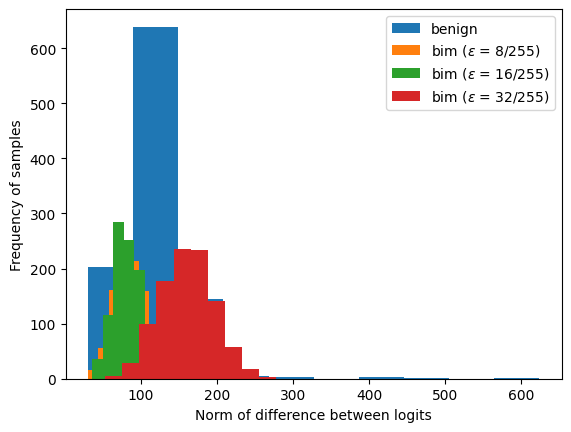

In [16]:
import matplotlib.pyplot as plt 

plt.hist(top_400_benign[0:1000], label="benign")
plt.hist(top_400_eps3[0:1000], label="bim ($\epsilon$ = 8/255)")
plt.hist(top_400_eps4[0:1000], label="bim ($\epsilon$ = 16/255)")
plt.hist(top_400_eps5[0:1000], label="bim ($\epsilon$ = 32/255)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.title("")
plt.show()

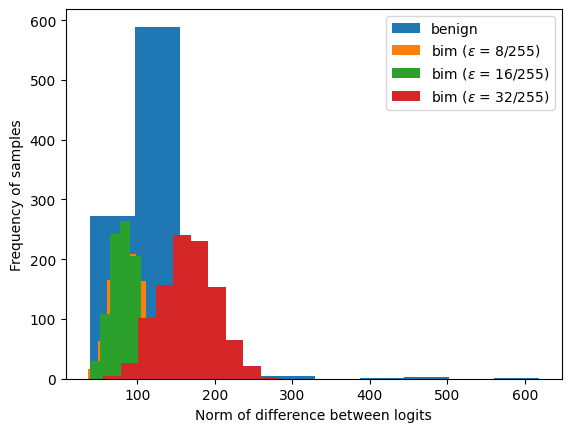

In [17]:
import matplotlib.pyplot as plt 

plt.hist(top_450_benign[0:1000], label="benign")
plt.hist(top_450_eps3[0:1000], label="bim ($\epsilon$ = 8/255)")
plt.hist(top_450_eps4[0:1000], label="bim ($\epsilon$ = 16/255)")
plt.hist(top_450_eps5[0:1000], label="bim ($\epsilon$ = 32/255)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.title("")
plt.show()

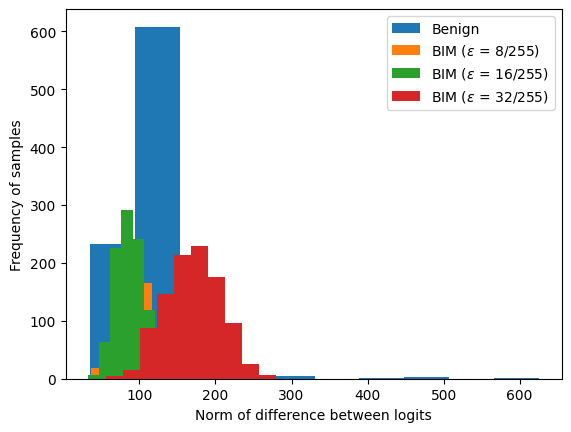

In [18]:
import matplotlib.pyplot as plt 

plt.hist(top_500_benign[0:1000], label="Benign")
plt.hist(top_500_eps3[0:1000], label="BIM ($\epsilon$ = 8/255)")
plt.hist(top_500_eps4[0:1000], label="BIM ($\epsilon$ = 16/255)")
plt.hist(top_500_eps5[0:1000], label="BIM ($\epsilon$ = 32/255)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.title("")
plt.savefig("plots/CIFARApproach1BIM.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [19]:
#cw conf1 
top_400_conf1 = df_cw_conf1.iloc[5].values.flatten().tolist()[1:]
top_450_conf1 = df_cw_conf1.iloc[6].values.flatten().tolist()[1:]
top_500_conf1 = df_cw_conf1.iloc[7].values.flatten().tolist()[1:]

#cw conf4
top_400_conf4 = df_cw_conf4.iloc[5].values.flatten().tolist()[1:]
top_450_conf4 = df_cw_conf4.iloc[6].values.flatten().tolist()[1:]
top_500_conf4 = df_cw_conf4.iloc[7].values.flatten().tolist()[1:]

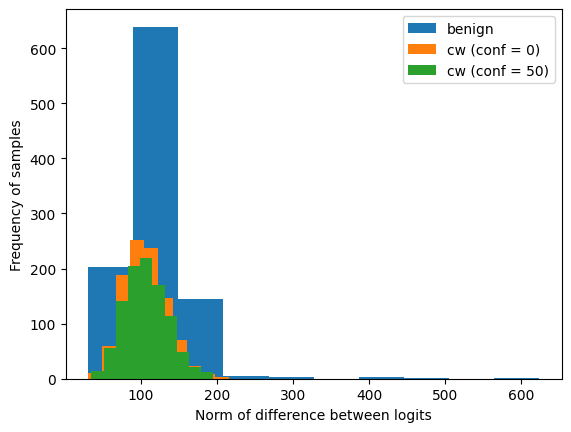

In [20]:
import matplotlib.pyplot as plt 

plt.hist(top_400_benign[0:1000], label="benign")
plt.hist(top_400_conf1[0:1000], label="cw (conf = 0)")
plt.hist(top_400_conf4[0:1000], label="cw (conf = 50)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.title("")
plt.show()

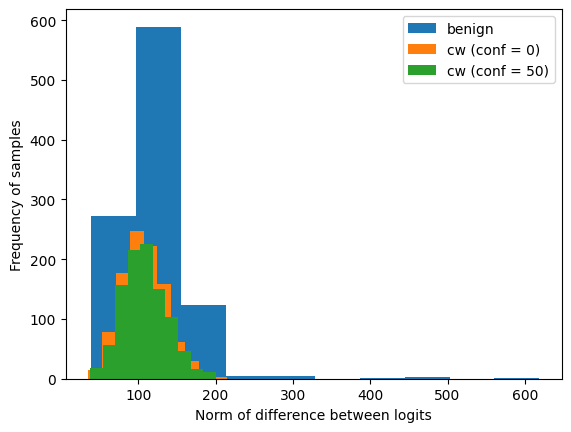

In [21]:
import matplotlib.pyplot as plt 

plt.hist(top_450_benign[0:1000], label="benign")
plt.hist(top_450_conf1[0:1000], label="cw (conf = 0)")
plt.hist(top_450_conf4[0:1000], label="cw (conf = 50)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.title("")
plt.show()

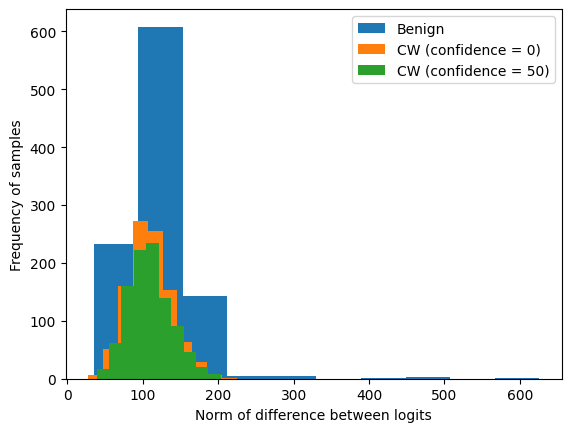

In [22]:
import matplotlib.pyplot as plt 

plt.hist(top_500_benign[0:1000], label="Benign")
plt.hist(top_500_conf1[0:1000], label="CW (confidence = 0)")
plt.hist(top_500_conf4[0:1000], label="CW (confidence = 50)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
plt.savefig("plots/CIFARApproach1CW.pdf", format="pdf", bbox_inches="tight")
#plt.title("")
plt.show()

# Approach 2: Model logit robustness 

In [23]:
#benign 
logit_gaussian1_benign = df_ben.iloc[12].values.flatten().tolist()[1:]
logit_gaussian2_benign = df_ben.iloc[13].values.flatten().tolist()[1:]
logit_gaussian3_benign = df_ben.iloc[14].values.flatten().tolist()[1:]
logit_uniform_benign = df_ben.iloc[15].values.flatten().tolist()[1:]

In [24]:
#pgd eps3 
logit_gaussian1_eps3 = df_pgd_eps3.iloc[12].values.flatten().tolist()[1:]
logit_gaussian2_eps3 = df_pgd_eps3.iloc[13].values.flatten().tolist()[1:]
logit_gaussian3_eps3 = df_pgd_eps3.iloc[14].values.flatten().tolist()[1:]
logit_uniform_eps3 = df_pgd_eps3.iloc[15].values.flatten().tolist()[1:]

#pgd eps4 
logit_gaussian1_eps4 = df_pgd_eps4.iloc[12].values.flatten().tolist()[1:]
logit_gaussian2_eps4 = df_pgd_eps4.iloc[13].values.flatten().tolist()[1:]
logit_gaussian3_eps4 = df_pgd_eps4.iloc[14].values.flatten().tolist()[1:]
logit_uniform_eps4 = df_pgd_eps4.iloc[15].values.flatten().tolist()[1:]

#pgd eps5 
logit_gaussian1_eps5 = df_pgd_eps5.iloc[12].values.flatten().tolist()[1:]
logit_gaussian2_eps5 = df_pgd_eps5.iloc[13].values.flatten().tolist()[1:]
logit_gaussian3_eps5 = df_pgd_eps5.iloc[14].values.flatten().tolist()[1:]
logit_uniform_eps5 = df_pgd_eps5.iloc[15].values.flatten().tolist()[1:]

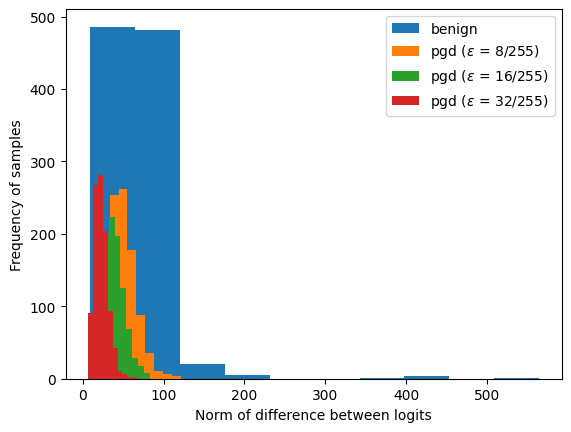

In [25]:
import matplotlib.pyplot as plt 

plt.hist(logit_gaussian1_benign[0:1000], label="benign")
plt.hist(logit_gaussian1_eps3[0:1000], label="pgd ($\epsilon$ = 8/255)")
plt.hist(logit_gaussian1_eps4[0:1000], label="pgd ($\epsilon$ = 16/255)")
plt.hist(logit_gaussian1_eps5[0:1000], label="pgd ($\epsilon$ = 32/255)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.title("")
plt.show()

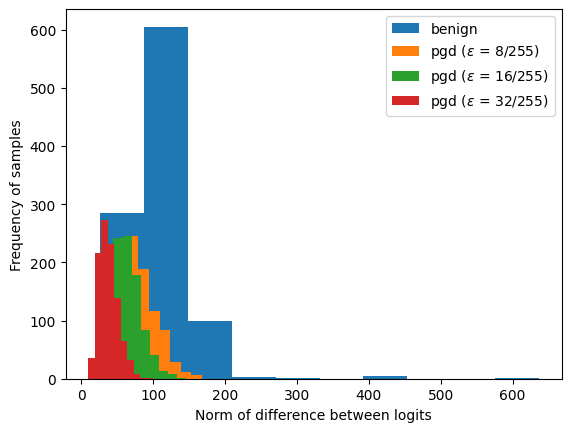

In [26]:
import matplotlib.pyplot as plt 

plt.hist(logit_gaussian2_benign[0:1000], label="benign")
plt.hist(logit_gaussian2_eps3[0:1000], label="pgd ($\epsilon$ = 8/255)")
plt.hist(logit_gaussian2_eps4[0:1000], label="pgd ($\epsilon$ = 16/255)")
plt.hist(logit_gaussian2_eps5[0:1000], label="pgd ($\epsilon$ = 32/255)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.title("")
plt.show()

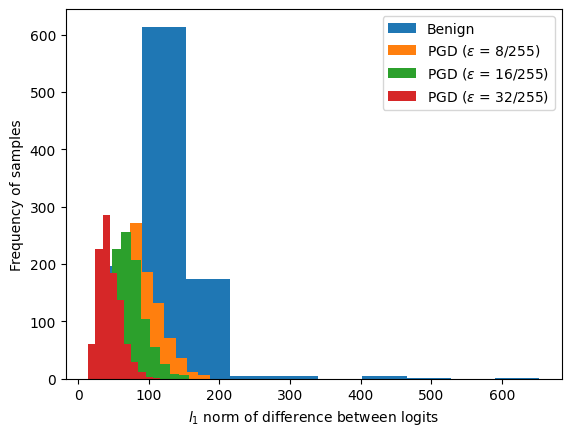

In [27]:
import matplotlib.pyplot as plt 

plt.hist(logit_gaussian3_benign[0:1000], label="Benign")
plt.hist(logit_gaussian3_eps3[0:1000], label="PGD ($\epsilon$ = 8/255)")
plt.hist(logit_gaussian3_eps4[0:1000], label="PGD ($\epsilon$ = 16/255)")
plt.hist(logit_gaussian3_eps5[0:1000], label="PGD ($\epsilon$ = 32/255)")
plt.xlabel("$l_1$ norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
plt.savefig("plots/CIFARApproach2aPGD.pdf", format="pdf", bbox_inches="tight")
plt.show()

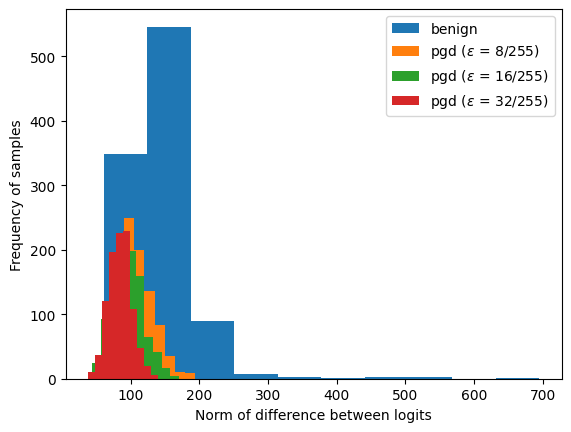

In [28]:
import matplotlib.pyplot as plt 

plt.hist(logit_uniform_benign[0:1000], label="benign")
plt.hist(logit_uniform_eps3[0:1000], label="pgd ($\epsilon$ = 8/255)")
plt.hist(logit_uniform_eps4[0:1000], label="pgd ($\epsilon$ = 16/255)")
plt.hist(logit_uniform_eps5[0:1000], label="pgd ($\epsilon$ = 32/255)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.title("")
plt.show()

In [29]:
#fgsm eps3 
logit_gaussian1_eps3 = df_fgsm_eps3.iloc[12].values.flatten().tolist()[1:]
logit_gaussian2_eps3 = df_fgsm_eps3.iloc[13].values.flatten().tolist()[1:]
logit_gaussian3_eps3 = df_fgsm_eps3.iloc[14].values.flatten().tolist()[1:]
logit_uniform_eps3 = df_fgsm_eps3.iloc[15].values.flatten().tolist()[1:]

#fgsm eps4 
logit_gaussian1_eps4 = df_fgsm_eps4.iloc[12].values.flatten().tolist()[1:]
logit_gaussian2_eps4 = df_fgsm_eps4.iloc[13].values.flatten().tolist()[1:]
logit_gaussian3_eps4 = df_fgsm_eps4.iloc[14].values.flatten().tolist()[1:]
logit_uniform_eps4 = df_fgsm_eps4.iloc[15].values.flatten().tolist()[1:]

#fgsm eps5 
logit_gaussian1_eps5 = df_fgsm_eps5.iloc[12].values.flatten().tolist()[1:]
logit_gaussian2_eps5 = df_fgsm_eps5.iloc[13].values.flatten().tolist()[1:]
logit_gaussian3_eps5 = df_fgsm_eps5.iloc[14].values.flatten().tolist()[1:]
logit_uniform_eps5 = df_fgsm_eps5.iloc[15].values.flatten().tolist()[1:]

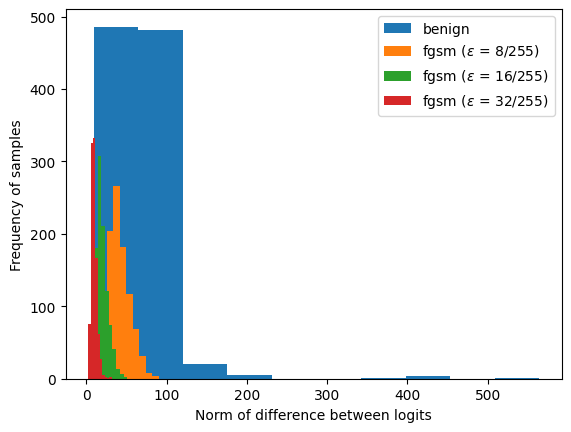

In [30]:
import matplotlib.pyplot as plt 

plt.hist(logit_gaussian1_benign[0:1000], label="benign")
plt.hist(logit_gaussian1_eps3[0:1000], label="fgsm ($\epsilon$ = 8/255)")
plt.hist(logit_gaussian1_eps4[0:1000], label="fgsm ($\epsilon$ = 16/255)")
plt.hist(logit_gaussian1_eps5[0:1000], label="fgsm ($\epsilon$ = 32/255)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.title("")
plt.show()

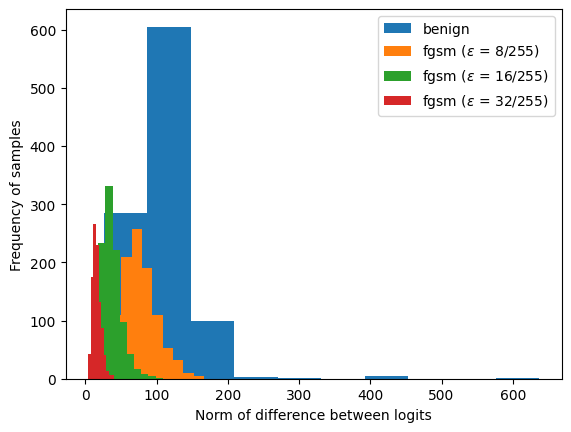

In [31]:
import matplotlib.pyplot as plt 

plt.hist(logit_gaussian2_benign[0:1000], label="benign")
plt.hist(logit_gaussian2_eps3[0:1000], label="fgsm ($\epsilon$ = 8/255)")
plt.hist(logit_gaussian2_eps4[0:1000], label="fgsm ($\epsilon$ = 16/255)")
plt.hist(logit_gaussian2_eps5[0:1000], label="fgsm ($\epsilon$ = 32/255)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.title("")
plt.show()

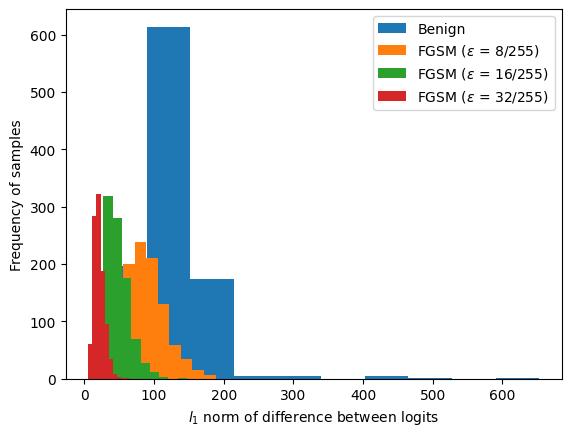

In [32]:
import matplotlib.pyplot as plt 

plt.hist(logit_gaussian3_benign[0:1000], label="Benign")
plt.hist(logit_gaussian3_eps3[0:1000], label="FGSM ($\epsilon$ = 8/255)")
plt.hist(logit_gaussian3_eps4[0:1000], label="FGSM ($\epsilon$ = 16/255)")
plt.hist(logit_gaussian3_eps5[0:1000], label="FGSM ($\epsilon$ = 32/255)")
plt.xlabel("$l_1$ norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
plt.savefig("plots/CIFARApproach2aFGSM.pdf", format="pdf", bbox_inches="tight")
plt.show()

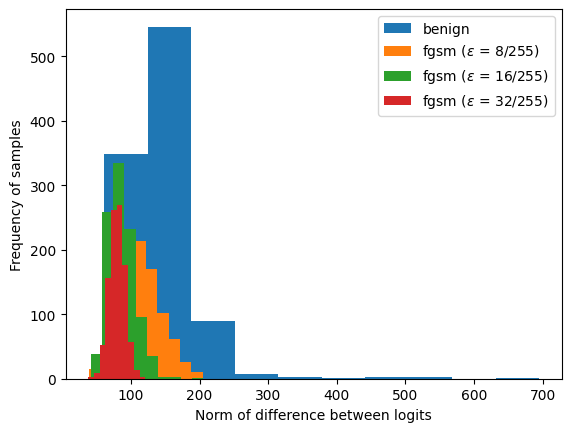

In [33]:
import matplotlib.pyplot as plt 

plt.hist(logit_uniform_benign[0:1000], label="benign")
plt.hist(logit_uniform_eps3[0:1000], label="fgsm ($\epsilon$ = 8/255)")
plt.hist(logit_uniform_eps4[0:1000], label="fgsm ($\epsilon$ = 16/255)")
plt.hist(logit_uniform_eps5[0:1000], label="fgsm ($\epsilon$ = 32/255)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.title("")
plt.show()

In [34]:
#bim eps3 
logit_gaussian1_eps3 = df_bim_eps3.iloc[12].values.flatten().tolist()[1:]
logit_gaussian2_eps3 = df_bim_eps3.iloc[13].values.flatten().tolist()[1:]
logit_gaussian3_eps3 = df_bim_eps3.iloc[14].values.flatten().tolist()[1:]
logit_uniform_eps3 = df_bim_eps3.iloc[15].values.flatten().tolist()[1:]

#bim eps4 
logit_gaussian1_eps4 = df_bim_eps4.iloc[12].values.flatten().tolist()[1:]
logit_gaussian2_eps4 = df_bim_eps4.iloc[13].values.flatten().tolist()[1:]
logit_gaussian3_eps4 = df_bim_eps4.iloc[14].values.flatten().tolist()[1:]
logit_uniform_eps4 = df_bim_eps4.iloc[15].values.flatten().tolist()[1:]

#bim eps5 
logit_gaussian1_eps5 = df_bim_eps5.iloc[12].values.flatten().tolist()[1:]
logit_gaussian2_eps5 = df_bim_eps5.iloc[13].values.flatten().tolist()[1:]
logit_gaussian3_eps5 = df_bim_eps5.iloc[14].values.flatten().tolist()[1:]
logit_uniform_eps5 = df_bim_eps5.iloc[15].values.flatten().tolist()[1:]

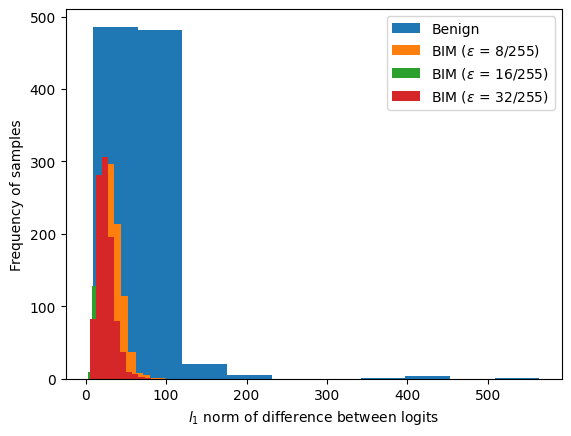

In [35]:
import matplotlib.pyplot as plt 

plt.hist(logit_gaussian1_benign[0:1000], label="Benign")
plt.hist(logit_gaussian1_eps3[0:1000], label="BIM ($\epsilon$ = 8/255)")
plt.hist(logit_gaussian1_eps4[0:1000], label="BIM ($\epsilon$ = 16/255)")
plt.hist(logit_gaussian1_eps5[0:1000], label="BIM ($\epsilon$ = 32/255)")
plt.xlabel("$l_1$ norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.title("")
plt.show()

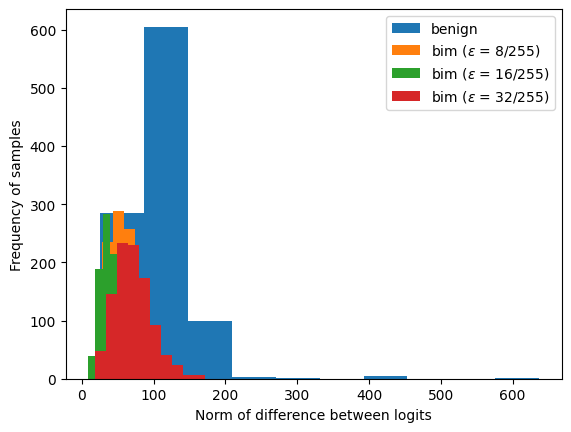

In [36]:
import matplotlib.pyplot as plt 

plt.hist(logit_gaussian2_benign[0:1000], label="benign")
plt.hist(logit_gaussian2_eps3[0:1000], label="bim ($\epsilon$ = 8/255)")
plt.hist(logit_gaussian2_eps4[0:1000], label="bim ($\epsilon$ = 16/255)")
plt.hist(logit_gaussian2_eps5[0:1000], label="bim ($\epsilon$ = 32/255)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.title("")
plt.show()

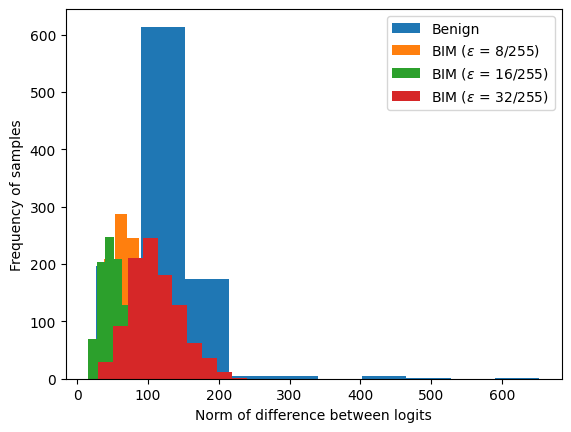

In [37]:
import matplotlib.pyplot as plt 

plt.hist(logit_gaussian3_benign[0:1000], label="Benign")
plt.hist(logit_gaussian3_eps3[0:1000], label="BIM ($\epsilon$ = 8/255)")
plt.hist(logit_gaussian3_eps4[0:1000], label="BIM ($\epsilon$ = 16/255)")
plt.hist(logit_gaussian3_eps5[0:1000], label="BIM ($\epsilon$ = 32/255)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
plt.savefig("plots/CIFARApproach2aBIM.pdf", format="pdf", bbox_inches="tight")
plt.show()

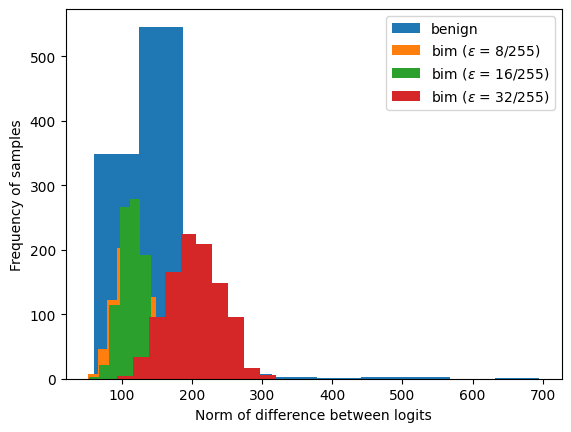

In [38]:
import matplotlib.pyplot as plt 

plt.hist(logit_uniform_benign[0:1000], label="benign")
plt.hist(logit_uniform_eps3[0:1000], label="bim ($\epsilon$ = 8/255)")
plt.hist(logit_uniform_eps4[0:1000], label="bim ($\epsilon$ = 16/255)")
plt.hist(logit_uniform_eps5[0:1000], label="bim ($\epsilon$ = 32/255)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.title("")
plt.show()

In [43]:
#cw conf1 
logit_gaussian1_conf1 = df_cw_conf1.iloc[12].values.flatten().tolist()[1:]
logit_gaussian2_conf1 = df_cw_conf1.iloc[13].values.flatten().tolist()[1:]
logit_gaussian3_conf1 = df_cw_conf1.iloc[14].values.flatten().tolist()[1:]
logit_uniform_conf1 = df_cw_conf1.iloc[15].values.flatten().tolist()[1:]


#cw conf4
logit_gaussian1_conf4 = df_cw_conf4.iloc[12].values.flatten().tolist()[1:]
logit_gaussian2_conf4 = df_cw_conf4.iloc[13].values.flatten().tolist()[1:]
logit_gaussian3_conf4 = df_cw_conf4.iloc[14].values.flatten().tolist()[1:]
logit_uniform_conf4 = df_cw_conf4.iloc[15].values.flatten().tolist()[1:]


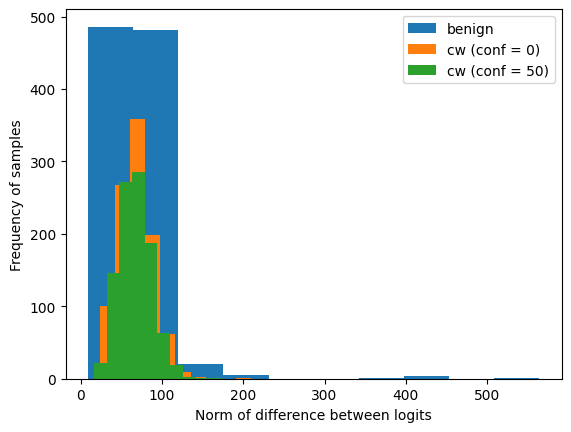

In [44]:
import matplotlib.pyplot as plt 

plt.hist(logit_gaussian1_benign[0:1000], label="benign")
plt.hist(logit_gaussian1_conf1[0:1000], label="cw (conf = 0)")
plt.hist(logit_gaussian1_conf4[0:1000], label="cw (conf = 50)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.title("")
plt.show()

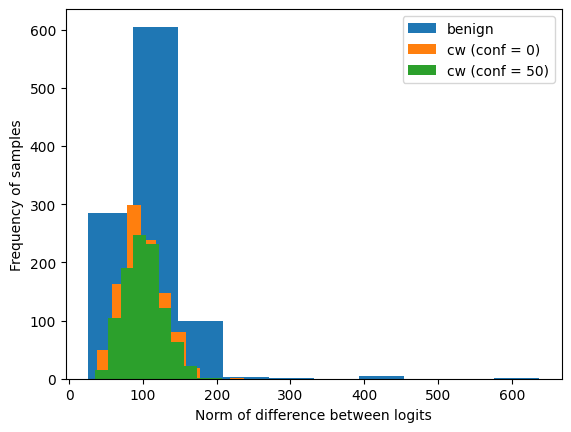

In [45]:
import matplotlib.pyplot as plt 

plt.hist(logit_gaussian2_benign[0:1000], label="benign")
plt.hist(logit_gaussian2_conf1[0:1000], label="cw (conf = 0)")
plt.hist(logit_gaussian2_conf4[0:1000], label="cw (conf = 50)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.title("")
plt.show()

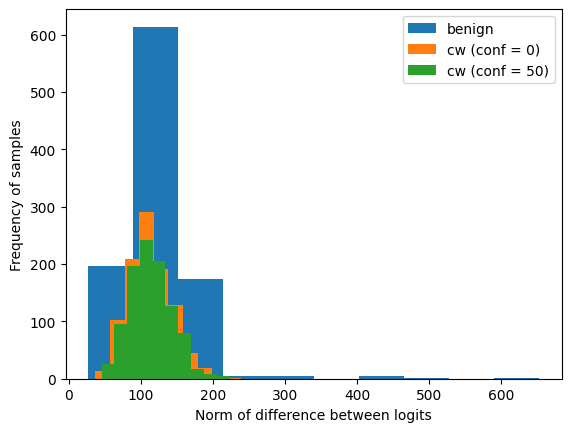

In [46]:
import matplotlib.pyplot as plt 

plt.hist(logit_gaussian3_benign[0:1000], label="benign")
plt.hist(logit_gaussian3_conf1[0:1000], label="cw (conf = 0)")
plt.hist(logit_gaussian3_conf4[0:1000], label="cw (conf = 50)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.title("")
plt.show()

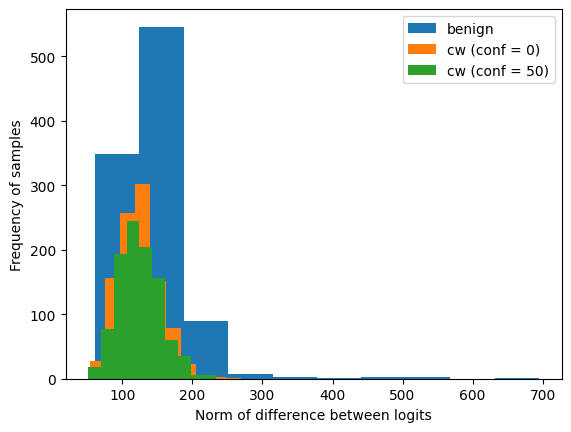

In [47]:
import matplotlib.pyplot as plt 

plt.hist(logit_uniform_benign[0:1000], label="benign")
plt.hist(logit_uniform_conf1[0:1000], label="cw (conf = 0)")
plt.hist(logit_uniform_conf4[0:1000], label="cw (conf = 50)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.title("")
plt.show()

# Approach 2: Attribution robustness

In [48]:
#benign 
attr_gaussian1_benign = df_ben.iloc[8].values.flatten().tolist()[1:]
attr_gaussian2_benign = df_ben.iloc[9].values.flatten().tolist()[1:]
attr_gaussian3_benign = df_ben.iloc[10].values.flatten().tolist()[1:]
attr_uniform_benign = df_ben.iloc[11].values.flatten().tolist()[1:]

In [49]:
#pgd eps3 
attr_gaussian1_eps3 = df_pgd_eps3.iloc[8].values.flatten().tolist()[1:]
attr_gaussian2_eps3 = df_pgd_eps3.iloc[9].values.flatten().tolist()[1:]
attr_gaussian3_eps3 = df_pgd_eps3.iloc[10].values.flatten().tolist()[1:]
attr_uniform_eps3 = df_pgd_eps3.iloc[11].values.flatten().tolist()[1:]

#pgd eps4 
attr_gaussian1_eps4 = df_pgd_eps4.iloc[8].values.flatten().tolist()[1:]
attr_gaussian2_eps4 = df_pgd_eps4.iloc[9].values.flatten().tolist()[1:]
attr_gaussian3_eps4 = df_pgd_eps4.iloc[10].values.flatten().tolist()[1:]
attr_uniform_eps4 = df_pgd_eps4.iloc[11].values.flatten().tolist()[1:]

#pgd eps5 
attr_gaussian1_eps5 = df_pgd_eps5.iloc[8].values.flatten().tolist()[1:]
attr_gaussian2_eps5 = df_pgd_eps5.iloc[9].values.flatten().tolist()[1:]
attr_gaussian3_eps5 = df_pgd_eps5.iloc[10].values.flatten().tolist()[1:]
attr_uniform_eps5 = df_pgd_eps5.iloc[11].values.flatten().tolist()[1:]

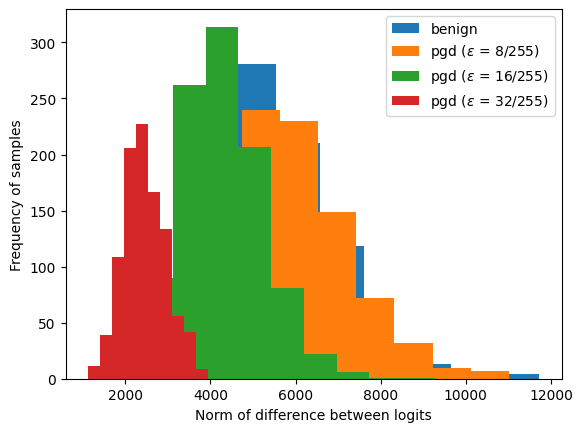

In [50]:
import matplotlib.pyplot as plt 
plt.hist(attr_gaussian1_benign[0:1000], label="benign")
plt.hist(attr_gaussian1_eps3[0:1000], label="pgd ($\epsilon$ = 8/255)")
plt.hist(attr_gaussian1_eps4[0:1000], label="pgd ($\epsilon$ = 16/255)")
plt.hist(attr_gaussian1_eps5[0:1000], label="pgd ($\epsilon$ = 32/255)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.title("")
plt.show()

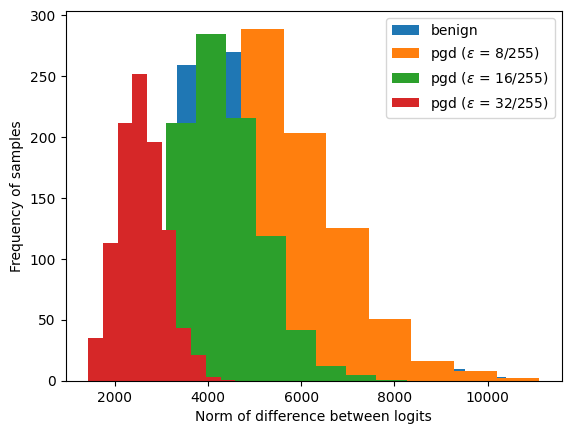

In [51]:
import matplotlib.pyplot as plt 
plt.hist(attr_gaussian2_benign[0:1000], label="benign")
plt.hist(attr_gaussian2_eps3[0:1000], label="pgd ($\epsilon$ = 8/255)")
plt.hist(attr_gaussian2_eps4[0:1000], label="pgd ($\epsilon$ = 16/255)")
plt.hist(attr_gaussian2_eps5[0:1000], label="pgd ($\epsilon$ = 32/255)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.title("")
plt.show()

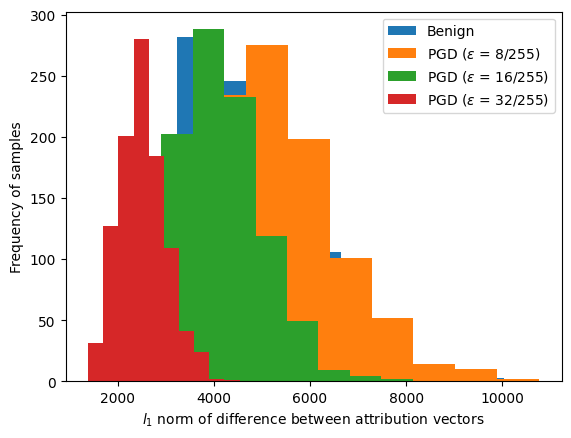

In [52]:
import matplotlib.pyplot as plt 
plt.hist(attr_gaussian3_benign[0:1000], label="Benign")
plt.hist(attr_gaussian3_eps3[0:1000], label="PGD ($\epsilon$ = 8/255)")
plt.hist(attr_gaussian3_eps4[0:1000], label="PGD ($\epsilon$ = 16/255)")
plt.hist(attr_gaussian3_eps5[0:1000], label="PGD ($\epsilon$ = 32/255)")
plt.xlabel("$l_1$ norm of difference between attribution vectors")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.savefig("plots/CIFARApproach2bPGD.pdf", format="pdf", bbox_inches="tight")
plt.show()

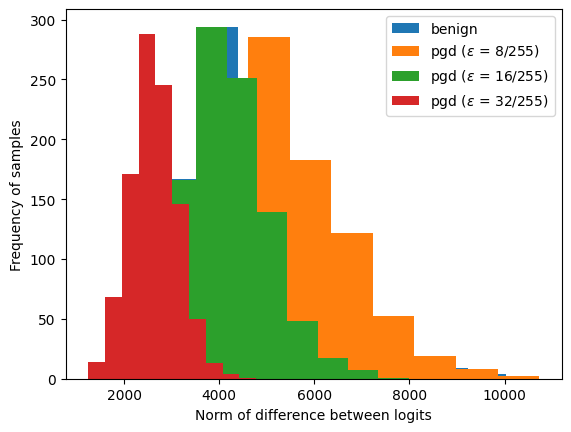

In [53]:
import matplotlib.pyplot as plt 
plt.hist(attr_uniform_benign[0:1000], label="benign")
plt.hist(attr_uniform_eps3[0:1000], label="pgd ($\epsilon$ = 8/255)")
plt.hist(attr_uniform_eps4[0:1000], label="pgd ($\epsilon$ = 16/255)")
plt.hist(attr_uniform_eps5[0:1000], label="pgd ($\epsilon$ = 32/255)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.title("")
plt.show()

In [54]:
#fgsm eps3 
attr_gaussian1_eps3 = df_fgsm_eps3.iloc[8].values.flatten().tolist()[1:]
attr_gaussian2_eps3 = df_fgsm_eps3.iloc[9].values.flatten().tolist()[1:]
attr_gaussian3_eps3 = df_fgsm_eps3.iloc[10].values.flatten().tolist()[1:]
attr_uniform_eps3 = df_fgsm_eps3.iloc[11].values.flatten().tolist()[1:]

#fgsm eps4 
attr_gaussian1_eps4 = df_fgsm_eps4.iloc[8].values.flatten().tolist()[1:]
attr_gaussian2_eps4 = df_fgsm_eps4.iloc[9].values.flatten().tolist()[1:]
attr_gaussian3_eps4 = df_fgsm_eps4.iloc[10].values.flatten().tolist()[1:]
attr_uniform_eps4 = df_fgsm_eps4.iloc[11].values.flatten().tolist()[1:]

#fgsm eps5 
attr_gaussian1_eps5 = df_fgsm_eps5.iloc[8].values.flatten().tolist()[1:]
attr_gaussian2_eps5 = df_fgsm_eps5.iloc[9].values.flatten().tolist()[1:]
attr_gaussian3_eps5 = df_fgsm_eps5.iloc[10].values.flatten().tolist()[1:]
attr_uniform_eps5 = df_fgsm_eps5.iloc[11].values.flatten().tolist()[1:]

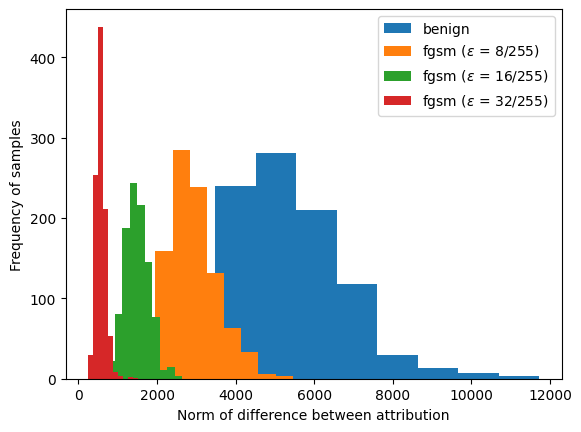

In [55]:
import matplotlib.pyplot as plt 
plt.hist(attr_gaussian1_benign[0:1000], label="benign")
plt.hist(attr_gaussian1_eps3[0:1000], label="fgsm ($\epsilon$ = 8/255)")
plt.hist(attr_gaussian1_eps4[0:1000], label="fgsm ($\epsilon$ = 16/255)")
plt.hist(attr_gaussian1_eps5[0:1000], label="fgsm ($\epsilon$ = 32/255)")
plt.xlabel("Norm of difference between attribution")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.title("")
plt.show()

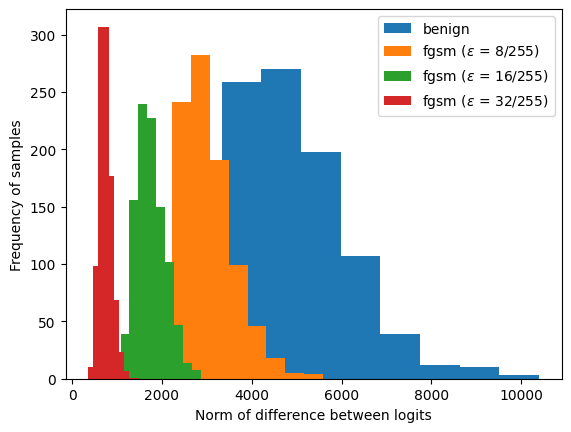

In [56]:
import matplotlib.pyplot as plt 
plt.hist(attr_gaussian2_benign[0:1000], label="benign")
plt.hist(attr_gaussian2_eps3[0:1000], label="fgsm ($\epsilon$ = 8/255)")
plt.hist(attr_gaussian2_eps4[0:1000], label="fgsm ($\epsilon$ = 16/255)")
plt.hist(attr_gaussian2_eps5[0:1000], label="fgsm ($\epsilon$ = 32/255)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.title("")
plt.show()

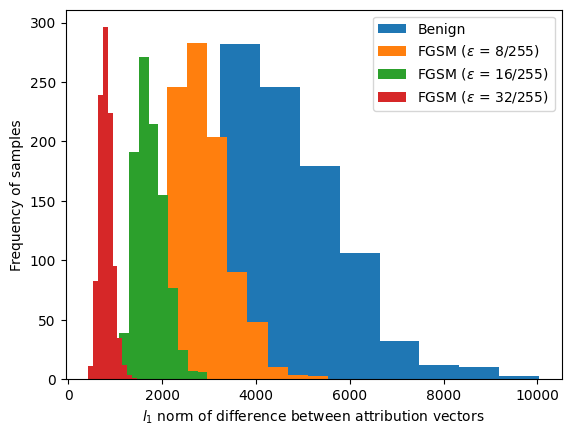

In [57]:
import matplotlib.pyplot as plt 
plt.hist(attr_gaussian3_benign[0:1000], label="Benign")
plt.hist(attr_gaussian3_eps3[0:1000], label="FGSM ($\epsilon$ = 8/255)")
plt.hist(attr_gaussian3_eps4[0:1000], label="FGSM ($\epsilon$ = 16/255)")
plt.hist(attr_gaussian3_eps5[0:1000], label="FGSM ($\epsilon$ = 32/255)")
plt.xlabel("$l_1$ norm of difference between attribution vectors")
plt.ylabel("Frequency of samples")
plt.legend()
plt.savefig("plots/CIFARApproach2bFGSM.pdf", format="pdf", bbox_inches="tight")
plt.show()

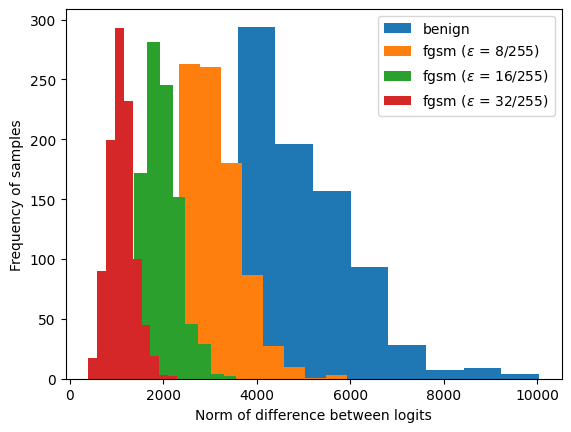

In [58]:
import matplotlib.pyplot as plt 
plt.hist(attr_uniform_benign[0:1000], label="benign")
plt.hist(attr_uniform_eps3[0:1000], label="fgsm ($\epsilon$ = 8/255)")
plt.hist(attr_uniform_eps4[0:1000], label="fgsm ($\epsilon$ = 16/255)")
plt.hist(attr_uniform_eps5[0:1000], label="fgsm ($\epsilon$ = 32/255)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.title("")
plt.show()

In [59]:
#bim eps3 
attr_gaussian1_eps3 = df_bim_eps3.iloc[8].values.flatten().tolist()[1:]
attr_gaussian2_eps3 = df_bim_eps3.iloc[9].values.flatten().tolist()[1:]
attr_gaussian3_eps3 = df_bim_eps3.iloc[10].values.flatten().tolist()[1:]
attr_uniform_eps3 = df_bim_eps3.iloc[11].values.flatten().tolist()[1:]

#bim eps4 
attr_gaussian1_eps4 = df_bim_eps4.iloc[8].values.flatten().tolist()[1:]
attr_gaussian2_eps4 = df_bim_eps4.iloc[9].values.flatten().tolist()[1:]
attr_gaussian3_eps4 = df_bim_eps4.iloc[10].values.flatten().tolist()[1:]
attr_uniform_eps4 = df_bim_eps4.iloc[11].values.flatten().tolist()[1:]

#bim eps5 
attr_gaussian1_eps5 = df_bim_eps5.iloc[8].values.flatten().tolist()[1:]
attr_gaussian2_eps5 = df_bim_eps5.iloc[9].values.flatten().tolist()[1:]
attr_gaussian3_eps5 = df_bim_eps5.iloc[10].values.flatten().tolist()[1:]
attr_uniform_eps5 = df_bim_eps5.iloc[11].values.flatten().tolist()[1:]

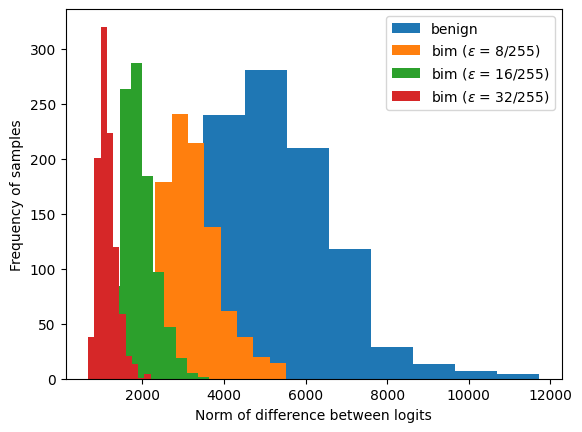

In [60]:
import matplotlib.pyplot as plt 
plt.hist(attr_gaussian1_benign[0:1000], label="benign")
plt.hist(attr_gaussian1_eps3[0:1000], label="bim ($\epsilon$ = 8/255)")
plt.hist(attr_gaussian1_eps4[0:1000], label="bim ($\epsilon$ = 16/255)")
plt.hist(attr_gaussian1_eps5[0:1000], label="bim ($\epsilon$ = 32/255)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.title("")
plt.show()

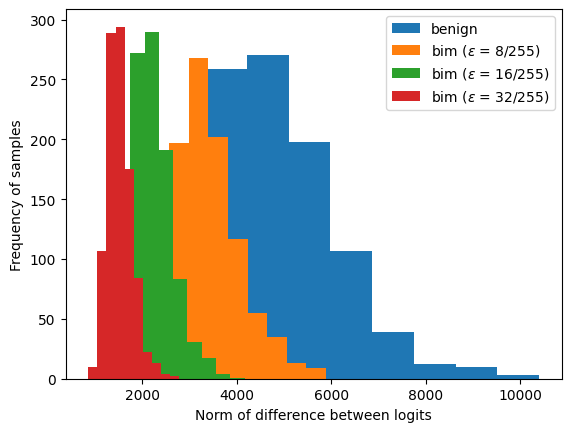

In [61]:
import matplotlib.pyplot as plt 
plt.hist(attr_gaussian2_benign[0:1000], label="benign")
plt.hist(attr_gaussian2_eps3[0:1000], label="bim ($\epsilon$ = 8/255)")
plt.hist(attr_gaussian2_eps4[0:1000], label="bim ($\epsilon$ = 16/255)")
plt.hist(attr_gaussian2_eps5[0:1000], label="bim ($\epsilon$ = 32/255)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.title("")
plt.show()

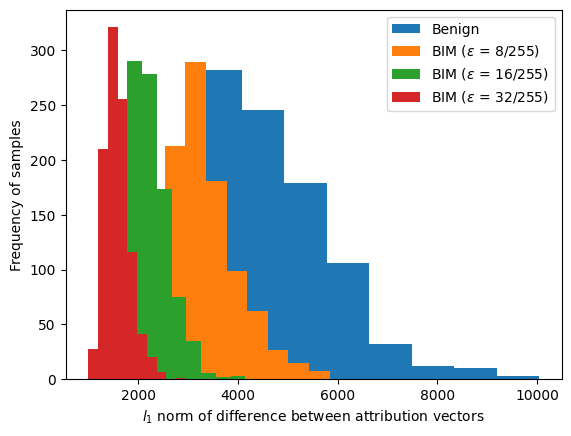

In [62]:
import matplotlib.pyplot as plt 
plt.hist(attr_gaussian3_benign[0:1000], label="Benign")
plt.hist(attr_gaussian3_eps3[0:1000], label="BIM ($\epsilon$ = 8/255)")
plt.hist(attr_gaussian3_eps4[0:1000], label="BIM ($\epsilon$ = 16/255)")
plt.hist(attr_gaussian3_eps5[0:1000], label="BIM ($\epsilon$ = 32/255)")
plt.xlabel("$l_1$ norm of difference between attribution vectors")
plt.ylabel("Frequency of samples")
plt.legend()
plt.savefig("plots/CIFARApproach2bBIM.pdf", format="pdf", bbox_inches="tight")
plt.show()

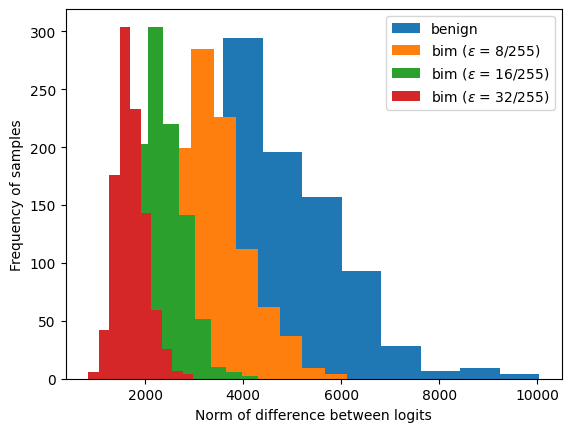

In [63]:
import matplotlib.pyplot as plt 
plt.hist(attr_uniform_benign[0:1000], label="benign")
plt.hist(attr_uniform_eps3[0:1000], label="bim ($\epsilon$ = 8/255)")
plt.hist(attr_uniform_eps4[0:1000], label="bim ($\epsilon$ = 16/255)")
plt.hist(attr_uniform_eps5[0:1000], label="bim ($\epsilon$ = 32/255)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.title("")
plt.show()

In [64]:
#cw conf1 
attr_gaussian1_conf1 = df_cw_conf1.iloc[8].values.flatten().tolist()[1:]
attr_gaussian2_conf1 = df_cw_conf1.iloc[9].values.flatten().tolist()[1:]
attr_gaussian3_conf1 = df_cw_conf1.iloc[10].values.flatten().tolist()[1:]
attr_uniform_conf1 = df_cw_conf1.iloc[11].values.flatten().tolist()[1:]

#cw conf4
attr_gaussian1_conf4 = df_cw_conf4.iloc[8].values.flatten().tolist()[1:]
attr_gaussian2_conf4 = df_cw_conf4.iloc[9].values.flatten().tolist()[1:]
attr_gaussian3_conf4 = df_cw_conf4.iloc[10].values.flatten().tolist()[1:]
attr_uniform_conf4 = df_cw_conf4.iloc[11].values.flatten().tolist()[1:]

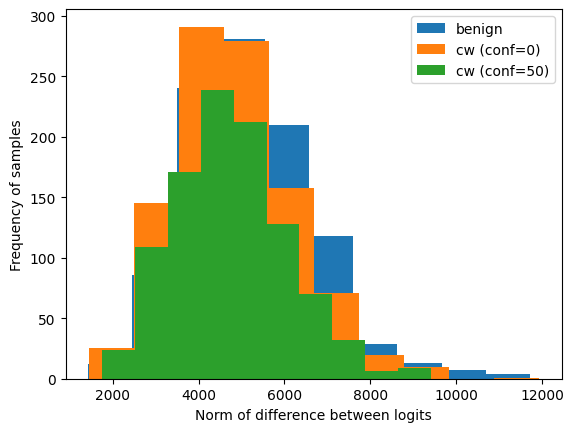

In [65]:
import matplotlib.pyplot as plt 
plt.hist(attr_gaussian1_benign[0:1000], label="benign")
plt.hist(attr_gaussian1_conf1[0:1000], label="cw (conf=0)")
plt.hist(attr_gaussian1_conf4[0:1000], label="cw (conf=50)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.title("")
plt.show()

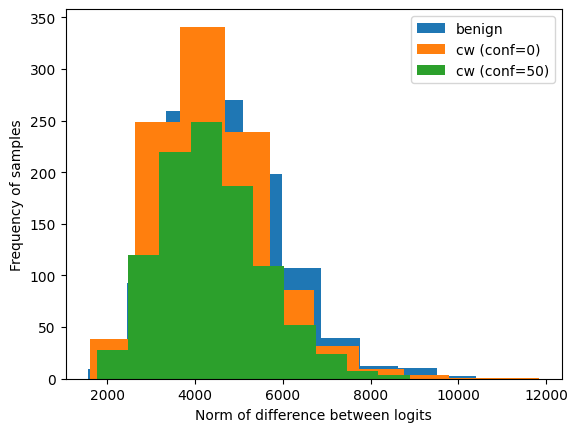

In [66]:
import matplotlib.pyplot as plt 
plt.hist(attr_gaussian2_benign[0:1000], label="benign")
plt.hist(attr_gaussian2_conf1[0:1000], label="cw (conf=0)")
plt.hist(attr_gaussian2_conf4[0:1000], label="cw (conf=50)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.title("")
plt.show()

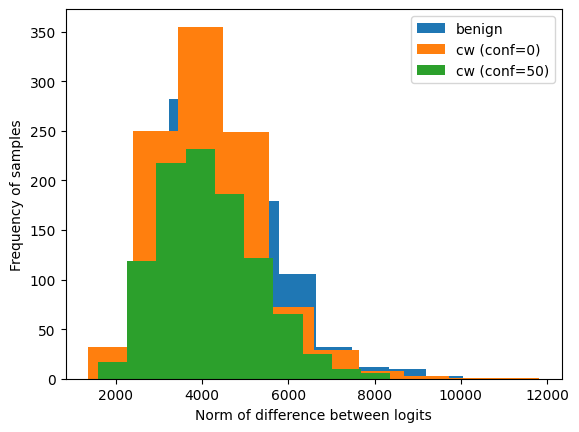

In [67]:
import matplotlib.pyplot as plt 
plt.hist(attr_gaussian3_benign[0:1000], label="benign")
plt.hist(attr_gaussian3_conf1[0:1000], label="cw (conf=0)")
plt.hist(attr_gaussian3_conf4[0:1000], label="cw (conf=50)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.title("")
plt.show()

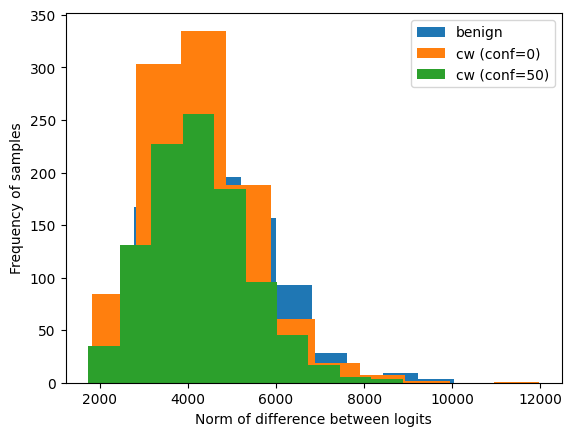

In [68]:
import matplotlib.pyplot as plt 
plt.hist(attr_uniform_benign[0:1000], label="benign")
plt.hist(attr_uniform_conf1[0:1000], label="cw (conf=0)")
plt.hist(attr_uniform_conf4[0:1000], label="cw (conf=50)")
plt.xlabel("Norm of difference between logits")
plt.ylabel("Frequency of samples")
plt.legend()
#plt.title("")
plt.show()

# Approach 3: Statistics

a. Mean absolute deviation

In [69]:
#benign 
meanAbsDev_benign = df_ben.iloc[1].values.flatten().tolist()[1:]

In [71]:
#pgd 
meanAbsDev_eps3 = df_pgd_eps3.iloc[1].values.flatten().tolist()[1:]
meanAbsDev_eps4 = df_pgd_eps4.iloc[1].values.flatten().tolist()[1:]
meanAbsDev_eps5 = df_pgd_eps5.iloc[1].values.flatten().tolist()[1:]

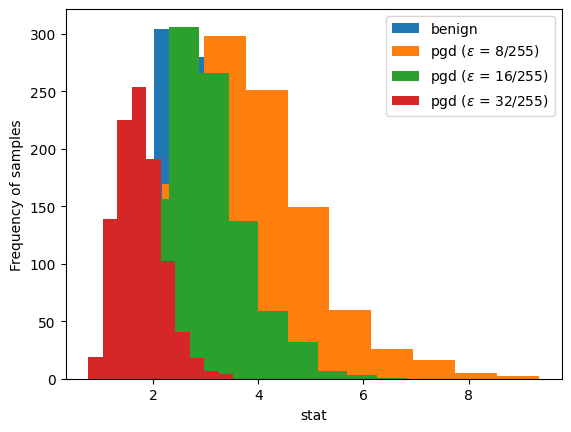

In [72]:
import matplotlib.pyplot as plt 

plt.hist(meanAbsDev_benign[0:1000], label="benign")
plt.hist(meanAbsDev_eps3[0:1000], label="pgd ($\epsilon$ = 8/255)")
plt.hist(meanAbsDev_eps4[0:1000], label="pgd ($\epsilon$ = 16/255)")
plt.hist(meanAbsDev_eps5[0:1000], label="pgd ($\epsilon$ = 32/255)")
plt.xlabel("stat")
plt.ylabel("Frequency of samples")
plt.legend()
plt.title("")
plt.show()

In [73]:
#fgsm 
meanAbsDev_eps3 = df_fgsm_eps3.iloc[1].values.flatten().tolist()[1:]
meanAbsDev_eps4 = df_fgsm_eps4.iloc[1].values.flatten().tolist()[1:]
meanAbsDev_eps5 = df_fgsm_eps5.iloc[1].values.flatten().tolist()[1:]

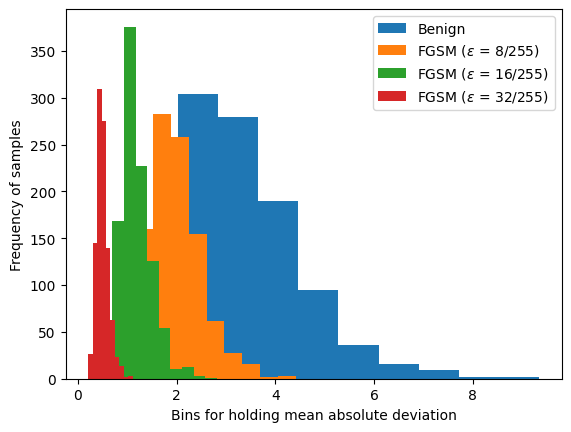

In [74]:
import matplotlib.pyplot as plt 

plt.hist(meanAbsDev_benign[0:1000], label="Benign")
plt.hist(meanAbsDev_eps3[0:1000], label="FGSM ($\epsilon$ = 8/255)")
plt.hist(meanAbsDev_eps4[0:1000], label="FGSM ($\epsilon$ = 16/255)")
plt.hist(meanAbsDev_eps5[0:1000], label="FGSM ($\epsilon$ = 32/255)")
plt.xlabel("Bins for holding mean absolute deviation")
plt.ylabel("Frequency of samples")
plt.legend()
plt.savefig("plots/CIFARMeanAbsDevFGSM.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [76]:
#bim
meanAbsDev_eps3 = df_bim_eps3.iloc[1].values.flatten().tolist()[1:]
meanAbsDev_eps4 = df_bim_eps4.iloc[1].values.flatten().tolist()[1:]
meanAbsDev_eps5 = df_bim_eps5.iloc[1].values.flatten().tolist()[1:]

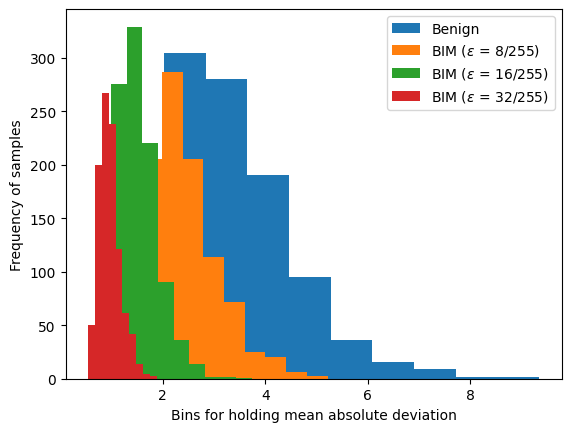

In [77]:
import matplotlib.pyplot as plt 

plt.hist(meanAbsDev_benign[0:1000], label="Benign")
plt.hist(meanAbsDev_eps3[0:1000], label="BIM ($\epsilon$ = 8/255)")
plt.hist(meanAbsDev_eps4[0:1000], label="BIM ($\epsilon$ = 16/255)")
plt.hist(meanAbsDev_eps5[0:1000], label="BIM ($\epsilon$ = 32/255)")
plt.xlabel("Bins for holding mean absolute deviation")
plt.ylabel("Frequency of samples")
plt.legend()
plt.savefig("plots/CIFARMeanAbsDevBIM.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [78]:
#cw 
meanAbsDev_conf1 = df_cw_conf1.iloc[1].values.flatten().tolist()[1:]
meanAbsDev_conf4 = df_cw_conf4.iloc[1].values.flatten().tolist()[1:]


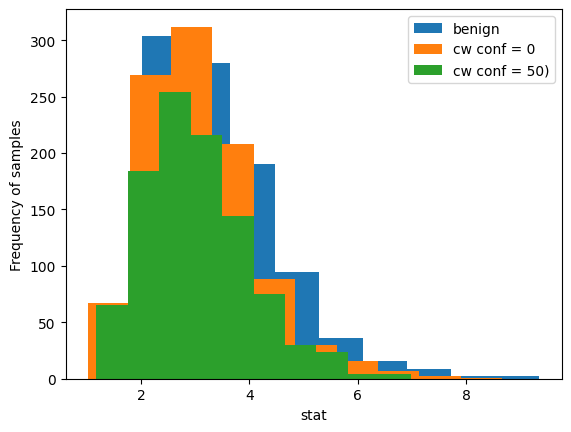

In [79]:
import matplotlib.pyplot as plt 

plt.hist(meanAbsDev_benign[0:1000], label="benign")
plt.hist(meanAbsDev_conf1[0:1000], label="cw conf = 0")
plt.hist(meanAbsDev_conf4[0:1000], label="cw conf = 50)")
plt.xlabel("stat")
plt.ylabel("Frequency of samples")
plt.legend()
plt.title("")
plt.show()

b. Median absolute deviation

In [80]:
medianAbsDev_benign = df_ben.iloc[0].values.flatten().tolist()[1:]

In [81]:
#pgd 
medianAbsDev_eps3 = df_pgd_eps3.iloc[0].values.flatten().tolist()[1:]
medianAbsDev_eps4 = df_pgd_eps4.iloc[0].values.flatten().tolist()[1:]
medianAbsDev_eps5 = df_pgd_eps5.iloc[0].values.flatten().tolist()[1:]

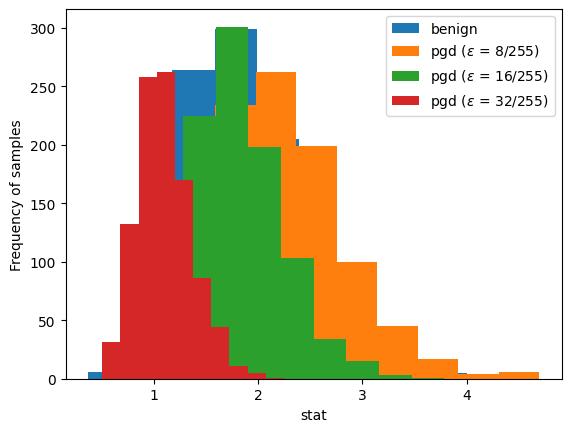

In [83]:
import matplotlib.pyplot as plt 

plt.hist(medianAbsDev_benign[0:1000], label="benign")
plt.hist(medianAbsDev_eps3[0:1000], label="pgd ($\epsilon$ = 8/255)")
plt.hist(medianAbsDev_eps4[0:1000], label="pgd ($\epsilon$ = 16/255)")
plt.hist(medianAbsDev_eps5[0:1000], label="pgd ($\epsilon$ = 32/255)")
plt.xlabel("stat")
plt.ylabel("Frequency of samples")
plt.legend()
plt.title("")
plt.show()

In [84]:
#fgsm 
x3 = df_fgsm_eps3.iloc[0].values.flatten().tolist()[1:]
x4 = df_fgsm_eps4.iloc[0].values.flatten().tolist()[1:]
x5 = df_fgsm_eps5.iloc[0].values.flatten().tolist()[1:]

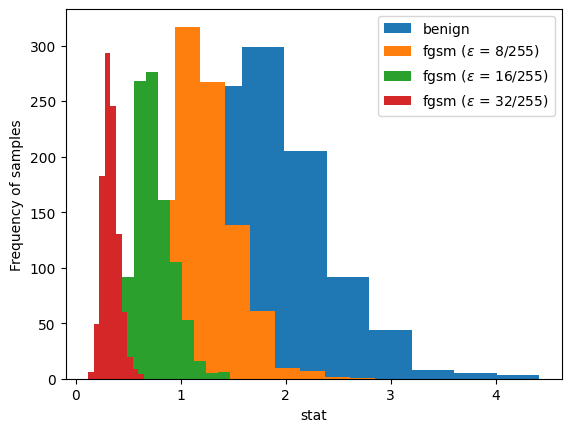

In [85]:
import matplotlib.pyplot as plt 

plt.hist(medianAbsDev_benign[0:1000], label="benign")
plt.hist(x3[0:1000], label="fgsm ($\epsilon$ = 8/255)")
plt.hist(x4[0:1000], label="fgsm ($\epsilon$ = 16/255)")
plt.hist(x5[0:1000], label="fgsm ($\epsilon$ = 32/255)")
plt.xlabel("stat")
plt.ylabel("Frequency of samples")
plt.legend()
plt.title("")
plt.show()

In [86]:
#bim 
x3 = df_bim_eps3.iloc[0].values.flatten().tolist()[1:]
x4 = df_bim_eps4.iloc[0].values.flatten().tolist()[1:]
x5 = df_bim_eps5.iloc[0].values.flatten().tolist()[1:]

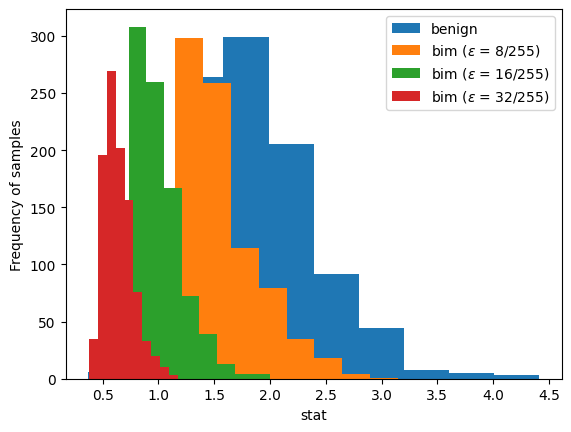

In [87]:
import matplotlib.pyplot as plt 

plt.hist(medianAbsDev_benign[0:1000], label="benign")
plt.hist(x3[0:1000], label="bim ($\epsilon$ = 8/255)")
plt.hist(x4[0:1000], label="bim ($\epsilon$ = 16/255)")
plt.hist(x5[0:1000], label="bim ($\epsilon$ = 32/255)")
plt.xlabel("stat")
plt.ylabel("Frequency of samples")
plt.legend()
plt.title("")
plt.show()

In [88]:
#cw 
x1 = df_cw_conf1.iloc[0].values.flatten().tolist()[1:]
x4 = df_cw_conf4.iloc[0].values.flatten().tolist()[1:]


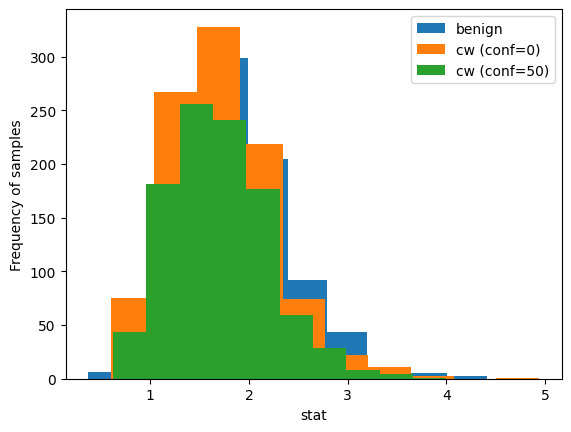

In [89]:
import matplotlib.pyplot as plt 

plt.hist(medianAbsDev_benign[0:1000], label="benign")
plt.hist(x1[0:1000], label="cw (conf=0)")
plt.hist(x4[0:1000], label="cw (conf=50)")
plt.xlabel("stat")
plt.ylabel("Frequency of samples")
plt.legend()
plt.title("")
plt.show()

c. IQR

In [90]:
iqr_benign = df_ben.iloc[2].values.flatten().tolist()[1:]

In [91]:
#pgd 
x3 = df_pgd_eps3.iloc[2].values.flatten().tolist()[1:]
x4 = df_pgd_eps4.iloc[2].values.flatten().tolist()[1:]
x5 = df_pgd_eps5.iloc[2].values.flatten().tolist()[1:]

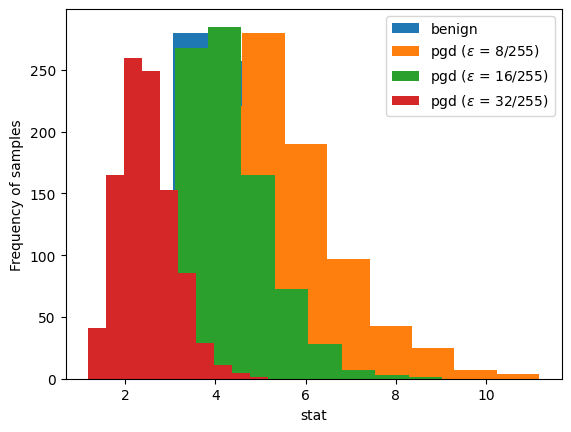

In [92]:
import matplotlib.pyplot as plt 

plt.hist(iqr_benign[0:1000], label="benign")
plt.hist(x3[0:1000], label="pgd ($\epsilon$ = 8/255)")
plt.hist(x4[0:1000], label="pgd ($\epsilon$ = 16/255)")
plt.hist(x5[0:1000], label="pgd ($\epsilon$ = 32/255)")
plt.xlabel("stat")
plt.ylabel("Frequency of samples")
plt.legend()
plt.title("")
plt.show()

In [93]:
#fgsm 
x3 = df_fgsm_eps3.iloc[2].values.flatten().tolist()[1:]
x4 = df_fgsm_eps4.iloc[2].values.flatten().tolist()[1:]
x5 = df_fgsm_eps5.iloc[2].values.flatten().tolist()[1:]

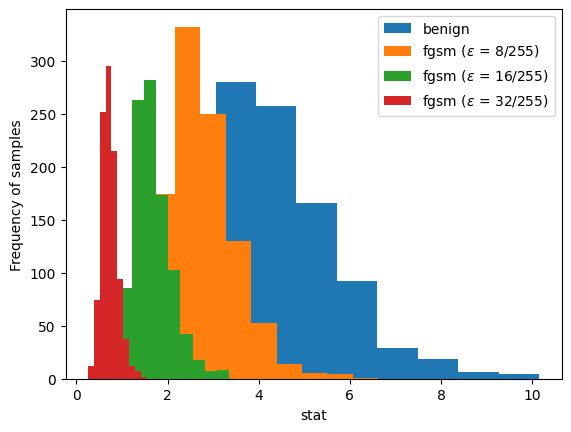

In [94]:
import matplotlib.pyplot as plt 

plt.hist(iqr_benign[0:1000], label="benign")
plt.hist(x3[0:1000], label="fgsm ($\epsilon$ = 8/255)")
plt.hist(x4[0:1000], label="fgsm ($\epsilon$ = 16/255)")
plt.hist(x5[0:1000], label="fgsm ($\epsilon$ = 32/255)")
plt.xlabel("stat")
plt.ylabel("Frequency of samples")
plt.legend()
plt.title("")
plt.show()

In [95]:
#bim 
x3 = df_bim_eps3.iloc[2].values.flatten().tolist()[1:]
x4 = df_bim_eps4.iloc[2].values.flatten().tolist()[1:]
x5 = df_bim_eps5.iloc[2].values.flatten().tolist()[1:]

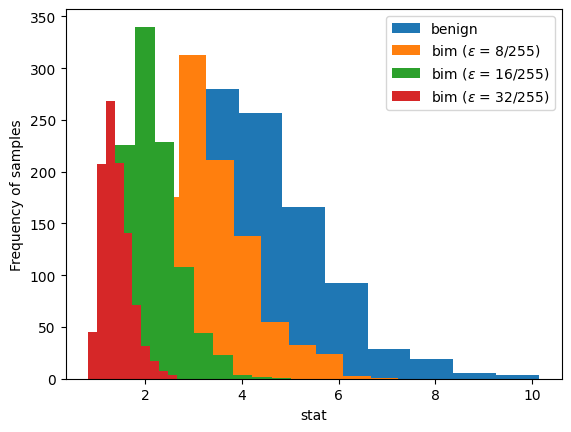

In [96]:
import matplotlib.pyplot as plt 

plt.hist(iqr_benign[0:1000], label="benign")
plt.hist(x3[0:1000], label="bim ($\epsilon$ = 8/255)")
plt.hist(x4[0:1000], label="bim ($\epsilon$ = 16/255)")
plt.hist(x5[0:1000], label="bim ($\epsilon$ = 32/255)")
plt.xlabel("stat")
plt.ylabel("Frequency of samples")
plt.legend()
plt.title("")
plt.show()

In [97]:
#cw 
x1 = df_cw_conf1.iloc[2].values.flatten().tolist()[1:]
x4 = df_cw_conf4.iloc[2].values.flatten().tolist()[1:]


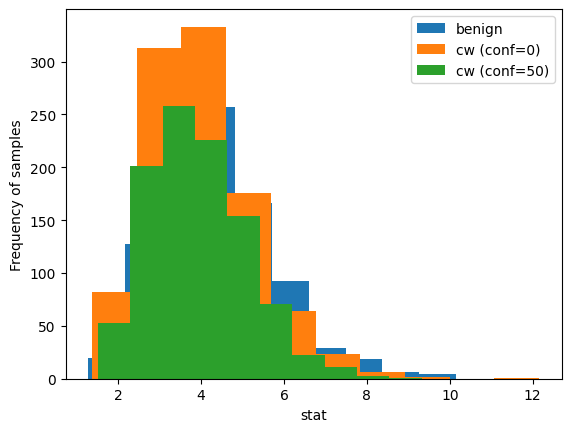

In [98]:
import matplotlib.pyplot as plt 

plt.hist(iqr_benign[0:1000], label="benign")
plt.hist(x1[0:1000], label="cw (conf=0)")
plt.hist(x4[0:1000], label="cw (conf=50)")
plt.xlabel("stat")
plt.ylabel("Frequency of samples")
plt.legend()
plt.title("")
plt.show()

d. Coefficient of IQR

In [99]:
coef_iqr_benign = df_ben.iloc[4].values.flatten().tolist()[1:]

In [100]:
#pgd 
x3 = df_pgd_eps3.iloc[4].values.flatten().tolist()[1:]
x4 = df_pgd_eps4.iloc[4].values.flatten().tolist()[1:]
x5 = df_pgd_eps5.iloc[4].values.flatten().tolist()[1:]

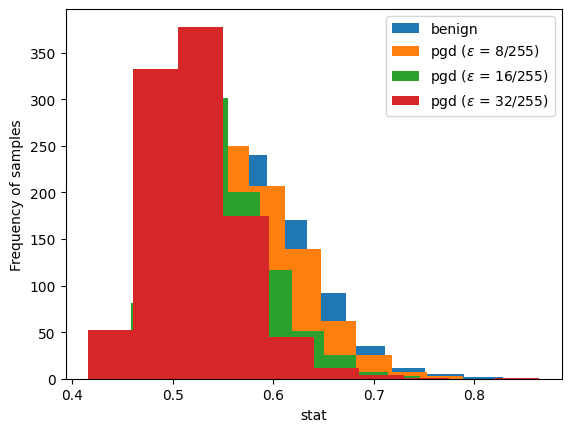

In [101]:
import matplotlib.pyplot as plt 

plt.hist(coef_iqr_benign[0:1000], label="benign")
plt.hist(x3[0:1000], label="pgd ($\epsilon$ = 8/255)")
plt.hist(x4[0:1000], label="pgd ($\epsilon$ = 16/255)")
plt.hist(x5[0:1000], label="pgd ($\epsilon$ = 32/255)")
plt.xlabel("stat")
plt.ylabel("Frequency of samples")
plt.legend()
plt.title("")
plt.show()

In [102]:
#fgsm 
x3 = df_fgsm_eps3.iloc[4].values.flatten().tolist()[1:]
x4 = df_fgsm_eps4.iloc[4].values.flatten().tolist()[1:]
x5 = df_fgsm_eps5.iloc[4].values.flatten().tolist()[1:]

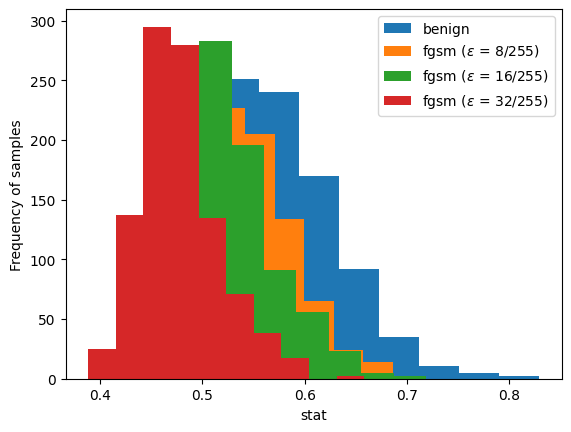

In [103]:
import matplotlib.pyplot as plt 

plt.hist(coef_iqr_benign[0:1000], label="benign")
plt.hist(x3[0:1000], label="fgsm ($\epsilon$ = 8/255)")
plt.hist(x4[0:1000], label="fgsm ($\epsilon$ = 16/255)")
plt.hist(x5[0:1000], label="fgsm ($\epsilon$ = 32/255)")
plt.xlabel("stat")
plt.ylabel("Frequency of samples")
plt.legend()
plt.title("")
plt.show()

In [104]:
#bim 
x3 = df_bim_eps3.iloc[4].values.flatten().tolist()[1:]
x4 = df_bim_eps4.iloc[4].values.flatten().tolist()[1:]
x5 = df_bim_eps5.iloc[4].values.flatten().tolist()[1:]

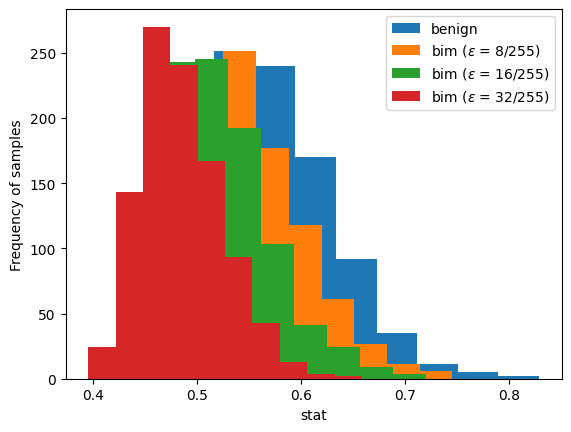

In [105]:
import matplotlib.pyplot as plt 

plt.hist(coef_iqr_benign[0:1000], label="benign")
plt.hist(x3[0:1000], label="bim ($\epsilon$ = 8/255)")
plt.hist(x4[0:1000], label="bim ($\epsilon$ = 16/255)")
plt.hist(x5[0:1000], label="bim ($\epsilon$ = 32/255)")
plt.xlabel("stat")
plt.ylabel("Frequency of samples")
plt.legend()
plt.title("")
plt.show()

In [106]:
#cw 
x1 = df_cw_conf1.iloc[4].values.flatten().tolist()[1:]
x4 = df_cw_conf4.iloc[4].values.flatten().tolist()[1:]


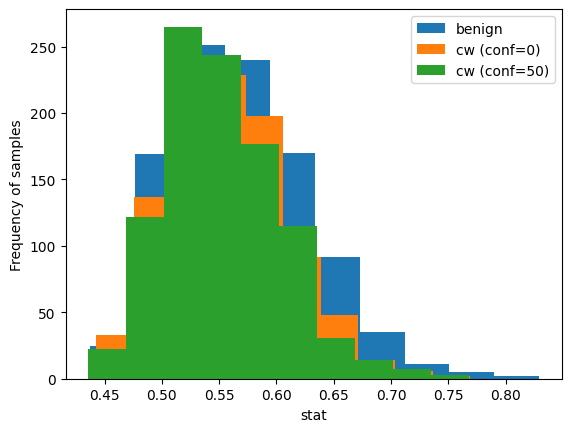

In [107]:
import matplotlib.pyplot as plt 

plt.hist(coef_iqr_benign[0:1000], label="benign")
plt.hist(x1[0:1000], label="cw (conf=0)")
plt.hist(x4[0:1000], label="cw (conf=50)")
plt.xlabel("stat")
plt.ylabel("Frequency of samples")
plt.legend()
plt.title("")
plt.show()

e. Coefficient of variance

In [108]:
coef_var_benign = df_ben.iloc[3].values.flatten().tolist()[1:]

In [109]:
#pgd 
x3 = df_pgd_eps3.iloc[3].values.flatten().tolist()[1:]
x4 = df_pgd_eps4.iloc[3].values.flatten().tolist()[1:]
x5 = df_pgd_eps5.iloc[3].values.flatten().tolist()[1:]

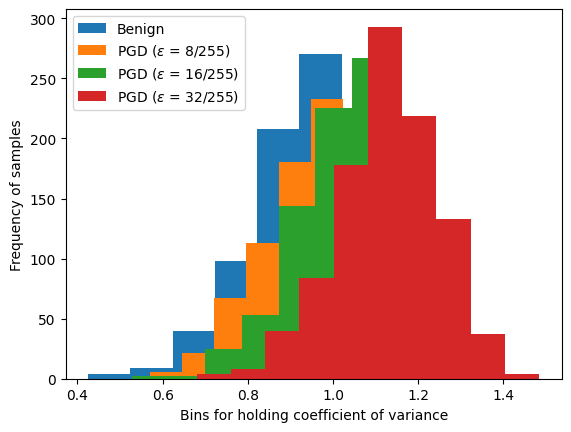

In [110]:
import matplotlib.pyplot as plt 

plt.hist(coef_var_benign[0:1000], label="Benign")
plt.hist(x3[0:1000], label="PGD ($\epsilon$ = 8/255)")
plt.hist(x4[0:1000], label="PGD ($\epsilon$ = 16/255)")
plt.hist(x5[0:1000], label="PGD ($\epsilon$ = 32/255)")
plt.xlabel("Bins for holding coefficient of variance")
plt.ylabel("Frequency of samples")
plt.legend()
plt.savefig("plots/CIFARCoefVarPGD.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [111]:
#fgsm 
x3 = df_fgsm_eps3.iloc[3].values.flatten().tolist()[1:]
x4 = df_fgsm_eps4.iloc[3].values.flatten().tolist()[1:]
x5 = df_fgsm_eps5.iloc[3].values.flatten().tolist()[1:]

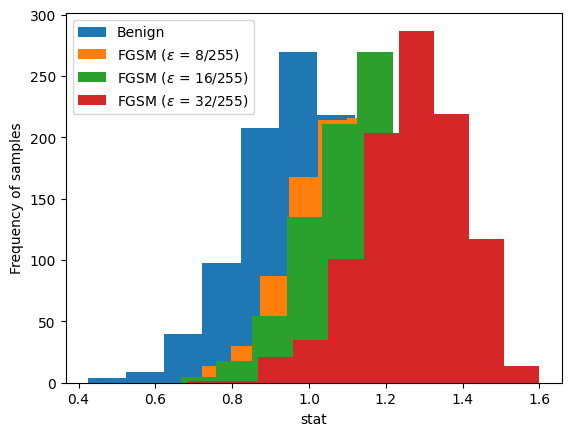

In [112]:
import matplotlib.pyplot as plt 

plt.hist(coef_var_benign[0:1000], label="Benign")
plt.hist(x3[0:1000], label="FGSM ($\epsilon$ = 8/255)")
plt.hist(x4[0:1000], label="FGSM ($\epsilon$ = 16/255)")
plt.hist(x5[0:1000], label="FGSM ($\epsilon$ = 32/255)")
plt.xlabel("stat")
plt.ylabel("Frequency of samples")
plt.legend()
plt.savefig("plots/CIFARCoefVarFGSM.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [113]:
#bim 
x3 = df_bim_eps3.iloc[3].values.flatten().tolist()[1:]
x4 = df_bim_eps4.iloc[3].values.flatten().tolist()[1:]
x5 = df_bim_eps5.iloc[3].values.flatten().tolist()[1:]

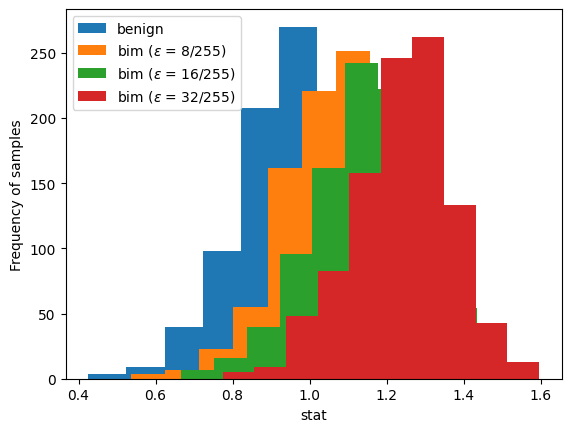

In [114]:
import matplotlib.pyplot as plt 

plt.hist(coef_var_benign[0:1000], label="benign")
plt.hist(x3[0:1000], label="bim ($\epsilon$ = 8/255)")
plt.hist(x4[0:1000], label="bim ($\epsilon$ = 16/255)")
plt.hist(x5[0:1000], label="bim ($\epsilon$ = 32/255)")
plt.xlabel("stat")
plt.ylabel("Frequency of samples")
plt.legend()
plt.title("")
plt.show()

In [115]:
#cw 
x1 = df_cw_conf1.iloc[3].values.flatten().tolist()[1:]
x4 = df_cw_conf4.iloc[3].values.flatten().tolist()[1:]


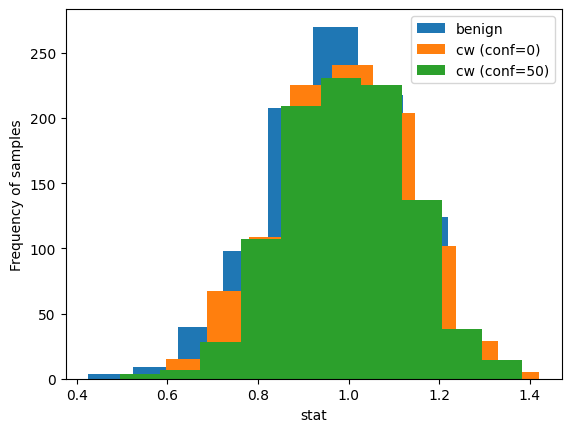

In [116]:
import matplotlib.pyplot as plt 

plt.hist(coef_var_benign[0:1000], label="benign")
plt.hist(x1[0:1000], label="cw (conf=0)")
plt.hist(x4[0:1000], label="cw (conf=50)")
plt.xlabel("stat")
plt.ylabel("Frequency of samples")
plt.legend()
plt.title("")
plt.show()

# Compute threshold based on a FPR

In [117]:
def compute_fpr(ben, t1, t2): 
    TN=0
    FN=0
    FP = 0 
    TP=0
    
    for value in ben: 
        if t1<=value<=t2:
            TN += 1
        else: 
            FP += 1
    
    return (FP/(FP+TN))*100

In [118]:
min(top_500_benign), max(top_500_benign), sum(top_500_benign)/len(top_500_benign)

(31.05861091613769, 956.945068359375, 123.59236067412142)

In [127]:
t1=[18,68,78]
t2=[280,280,280]
for x, y in zip(t1,t2):
    print(compute_fpr(top_500_benign, x, y))
    print("---")

1.1077844311377245
---
5.33932135728543
---
10.199600798403194
---


# Approach 2

In [128]:
min(logit_gaussian3_benign), max(logit_gaussian3_benign)

(24.351213455200195, 973.0506591796876)

In [133]:
#approach 2a: model logit robustness
t1=[41,60,75]
t2=[405,405,405]
for x, y in zip(t1,t2):
    print(compute_fpr(logit_gaussian3_benign, x, y))
    print("---")

1.127744510978044
---
4.730538922155689
---
10.099800399201598
---


In [134]:
min(attr_gaussian3_benign), max(attr_gaussian3_benign)

(1485.681640625, 12926.4345703125)

In [137]:
#approach 2b: attribution robustness
t1=[2200,2750,3100]
t2=[8800,8800,8800]
for x, y in zip(t1,t2):
    print(compute_fpr(attr_gaussian3_benign, x, y))
    print("---")

1.2475049900199602
---
5.089820359281437
---
10.868263473053892
---


# Approach 3

In [138]:
min(meanAbsDev_benign), max(meanAbsDev_benign)

(0.8469166159629822, 12.05024242401123)

In [139]:
#approach 3: meanAbsDev_benign
t1=[1.3,1.85,2]
t2=[7,7,6]
for x, y in zip(t1,t2):
    print(compute_fpr(meanAbsDev_benign, x, y))
    print("---")

1.407185628742515
---
5.668662674650698
---
10.379241516966067
---


In [140]:
min(medianAbsDev_benign), max(medianAbsDev_benign)

(0.3701245486736297, 5.097251892089844)

In [141]:
#approach 3: medianAbsDev_benign
t1=[0.9,1.08,1.23]
t2=[5,4,4]
for x, y in zip(t1,t2):
    print(compute_fpr(medianAbsDev_benign, x, y))
    print("---")

1.5369261477045908
---
5.528942115768463
---
11.187624750499001
---


In [142]:
min(iqr_benign), max(iqr_benign)

(1.049231581389904, 12.562658727169037)

In [143]:
#approach 3: iqr_benign
t1=[2,2.5,2.8]
t2=[10,10,10]
for x, y in zip(t1,t2):
    print(compute_fpr(iqr_benign, x, y))
    print("---")

1.1976047904191618
---
5.429141716566866
---
10.319361277445111
---


In [144]:
min(coef_iqr_benign), max(coef_iqr_benign)

(0.3902264774949213, 0.8517356939197166)

In [145]:
#approach 3: coef_iqr_benign
t1=[0.461,0.491,0.502]
t2=[0.8,0.8,10]
for x, y in zip(t1,t2):
    print(compute_fpr(coef_iqr_benign, x, y))
    print("---")

1.037924151696607
---
5.898203592814371
---
10.189620758483034
---


In [146]:
min(coef_var_benign), max(coef_var_benign)

(0.4055161476135254, 1.5120035409927368)

In [147]:
#approach 3: coef_var_benign
t1=[0.42,0.42,0.42]
t2=[1.27,1.19,1.146]
for x, y in zip(t1,t2):
    print(compute_fpr(coef_var_benign, x, y))
    print("---")

1.2674650698602794
---
5.3293413173652695
---
10.469061876247505
---
